In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format='retina' 

# 데이터 결합 및 전처리

In [ ]:
data0 = pd.read_csv('/content/drive/MyDrive/데이터/휴폐업 중소법인 재무보유.csv') 
data0

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,N,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN
6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,N,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0
6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,N,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0
6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN


In [ ]:
df_code = data0[['IND_CD1', 'MN_BIZ_CONT']]
df_code

,IND_CD1,MN_BIZ_CONT
0,30391.0,자동차부품 제조판매업
1,46610.0,건축자재 판매업
2,46510.0,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기"
3,25991.0,금속 캔 및 기타 포장용기 제조업
4,24199.0,스마트트레이 외
...,...,...
6734,10200.0,간장게장(장류)
6735,10122.0,"돈가스, 탕수육, 꿔바로우"
6736,56111.0,"한식, 중식"
6737,58222.0,1.인공지능(AI) 솔루션 구축 및 관련사업


In [ ]:
df_code.sort_values('IND_CD1')

,IND_CD1,MN_BIZ_CONT
2389,1110.0,"농축수산물의 생산, 구매, 저장, 유통 및 판매업"
4288,1121.0,농산물의 생산.유통.가공.판매
6235,1121.0,작물 재배업
6219,1121.0,농작물 재배 및 국외 재배업
5084,1121.0,"농산물의 생산, 유통, 가공, 판매"
...,...,...
6521,NaN,"의류, 전기 기자재"
6606,NaN,NaN
6609,NaN,합성목재
6631,NaN,자동화설비 제조


In [ ]:
sum(df_code['IND_CD1'].isnull())

150

In [ ]:
df_code[df_code['IND_CD1'] <= 1200]

,IND_CD1,MN_BIZ_CONT
2389,1110.0,"농축수산물의 생산, 구매, 저장, 유통 및 판매업"
4173,1159.0,"농산물의 생산, 가공"
4177,1121.0,양파즙
4199,1159.0,"농산물의 생산, 가공"
4288,1121.0,농산물의 생산.유통.가공.판매
4413,1159.0,"약용작물, 사료작물 및 공업용 원료작물 등 기타 작물 재배업"
4867,1152.0,"채소, 화훼 및 과실작물 시설 재배업\r"
5084,1121.0,"농산물의 생산, 유통, 가공, 판매"
5305,1200.0,"작물재배,한우사육판매 농업,축산업"
5992,1152.0,식품 육가공


In [ ]:
df_code[(df_code['IND_CD1'] > 1200) & (df_code['IND_CD1'] <= 1300)]

,IND_CD1,MN_BIZ_CONT
2529,1231.0,종계의 사육 및 종란생산업
2851,1220.0,"농,축산물의 유통, 가공, 판매업"
3631,1231.0,육계병아리 생산 및 판매사업
4520,1300.0,농산물의 생산.유통.가공.판매
4632,1299.0,축산업
4699,1231.0,양계 및 축산물 가공업


In [ ]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IND_CD1      6589 non-null   float64
 1   MN_BIZ_CONT  6571 non-null   object 
dtypes: float64(1), object(1)
memory usage: 105.4+ KB


In [ ]:
dff = df_code[df_code['IND_CD1'].notnull()]
dff = dff.sort_values('IND_CD1')
dff

,IND_CD1,MN_BIZ_CONT
2389,1110.0,"농축수산물의 생산, 구매, 저장, 유통 및 판매업"
4288,1121.0,농산물의 생산.유통.가공.판매
6235,1121.0,작물 재배업
6219,1121.0,농작물 재배 및 국외 재배업
5084,1121.0,"농산물의 생산, 유통, 가공, 판매"
...,...,...
5803,96995.0,애완 동물 장묘 및 보호 서비스업
4671,96999.0,배달대행업
6342,96999.0,자동차 신품판매 중개 외
1195,96999.0,"전기 및 가스기기의 제조, 판매 및 수출입"


In [ ]:
df0 = data0.copy()

In [ ]:
df0

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,N,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN
6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,N,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0
6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,N,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0
6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN


In [ ]:
df0 = df0[df0['IND_CD1'].notnull()]
df0['IND_CD1'] = df0['IND_CD1'].astype('int')
df0['IND_CD1'] = df0['IND_CD1'].astype('str')
df0['IND_CD1'] = df0['IND_CD1'].str.rjust(width=5, fillchar='0')
df0['산업코드'] = df0['IND_CD1'].str.slice(start=0, stop=2)

<ipython-input-10-8c06c7a25ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IND_CD1'] = df['IND_CD1'].astype('int')
<ipython-input-10-8c06c7a25ee7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IND_CD1'] = df['IND_CD1'].astype('str')
<ipython-input-10-8c06c7a25ee7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df0.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,산업코드
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0,30
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0,46
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0,46
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0,25
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0,24


In [ ]:
df1 = df0.sort_values('산업코드')

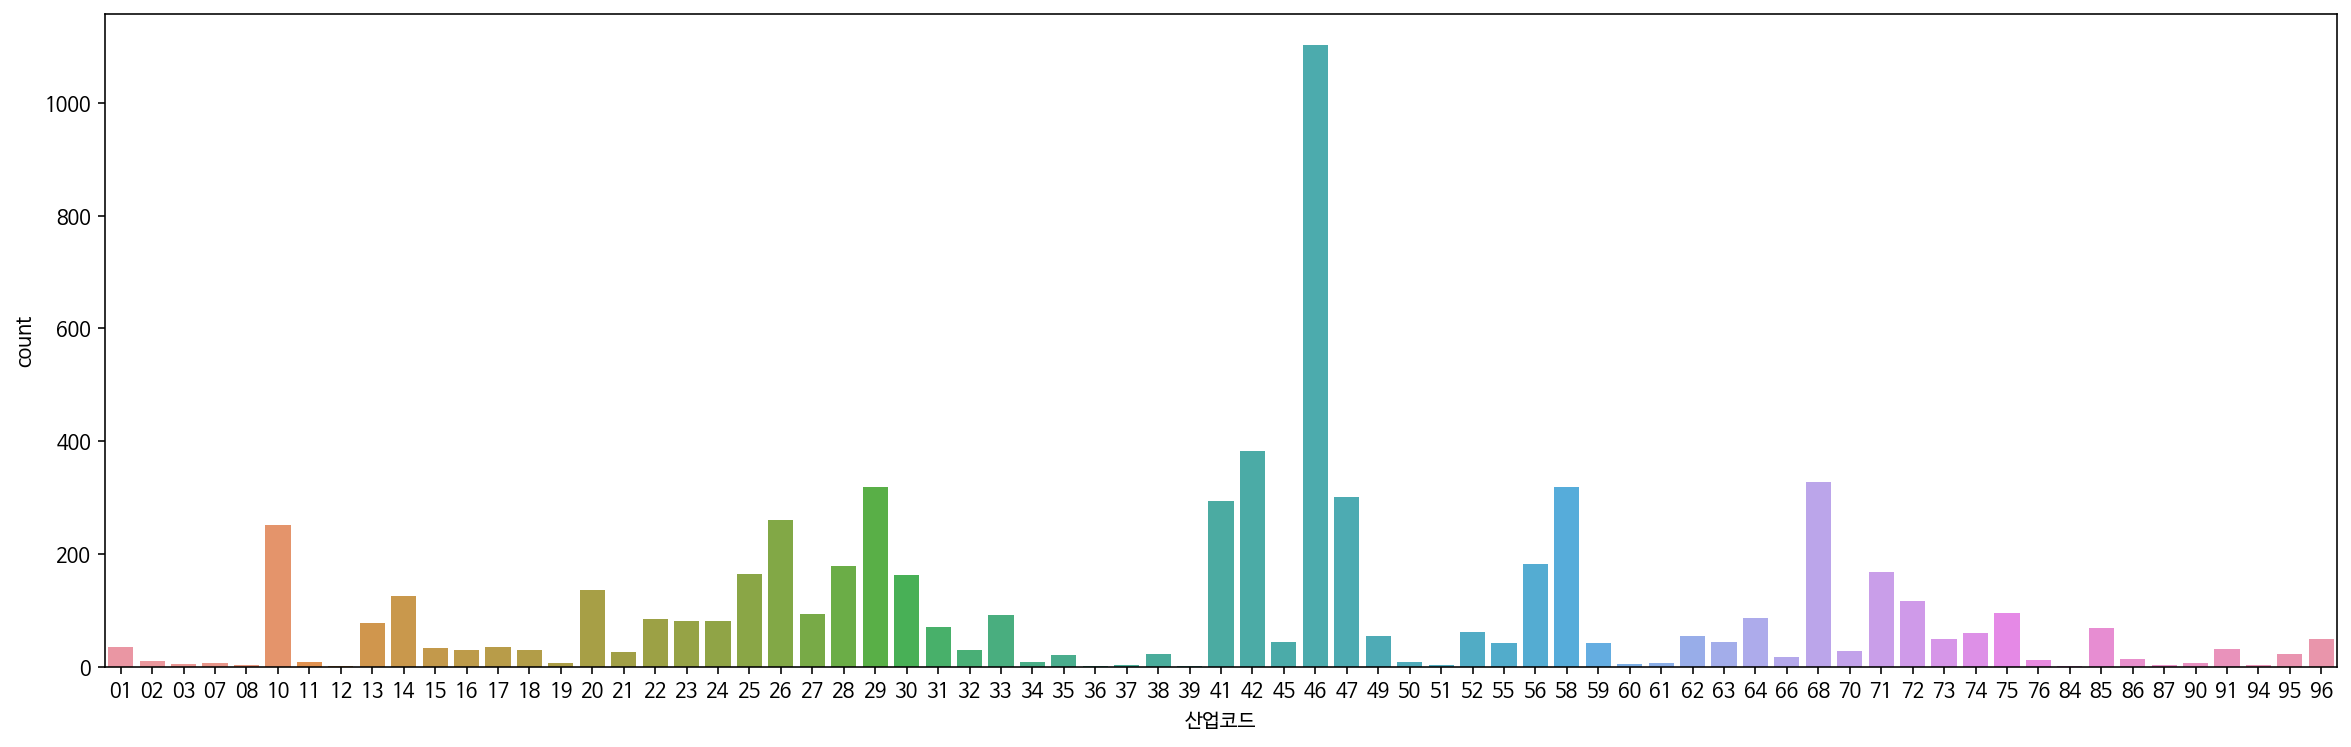

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='산업코드', data=df1)
plt.show()

In [ ]:
df1['산업코드'] = df1['산업코드'].astype('int')

In [ ]:
bins = [0,3,8,34,35,39,42,47,52,56,63,66,68,73,76,84,85,87,91,96,98,100]
labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']
cats = pd.cut(df1['산업코드'], bins, labels=labels)
pd.value_counts(cats)

c    2384
g    1446
f     677
j     470
m     359
l     327
i     223
n     167
h     129
k     104
s      75
p      68
a      49
r      38
e      26
d      21
q      16
b       9
o       1
t       0
u       0
Name: 산업코드, dtype: int64

In [ ]:
df1['산업코드'].describe()

count    6589.000000
mean       43.091213
std        19.411836
min         1.000000
25%        28.000000
50%        46.000000
75%        56.000000
max        96.000000
Name: 산업코드, dtype: float64

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터/재무데이터+산업코드_최종.csv') 
df

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,산업코드,산업코드_eng,폐업여부
0,1018100340,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,721100.0,...,1.000000e+12,5.171175e+01,1.000000e+12,3243.000000,NaN,NaN,NaN,68,L,0.0
1,1018100772,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,52000.0,...,1.000000e+12,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,NaN,NaN,55,I,0.0
2,1018101126,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,1539640.0,...,1.000000e+12,2.581250e+01,1.000000e+12,902.750000,1.516039e+06,527.5,NaN,68,L,0.0
3,1018101242,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,450000.0,...,1.000000e+12,1.859625e+01,1.000000e+12,NaN,1.178152e+06,NaN,NaN,68,L,0.0
4,1018103819,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,500000.0,...,1.000000e+12,2.059725e+01,1.000000e+12,12500.000000,NaN,NaN,NaN,68,L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,...,5.713500e+00,8.110500e+00,1.325500e+01,NaN,2.736914e+06,NaN,340673.00,41,F,1.0
35705,8998701263,9.025398e+06,NaN,NaN,NaN,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,459000.0,...,1.000000e+12,1.000000e+12,1.000000e+12,NaN,NaN,NaN,NaN,64,K,1.0
35706,8998800150,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,990000.0,...,8.888400e+01,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,105701.5,416709.00,72,M,0.0
35707,8998800427,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,489500.0,...,2.500000e+11,2.500000e+11,2.500000e+11,321181.333333,1.542906e+07,442612.0,2826866.75,26,C,0.0


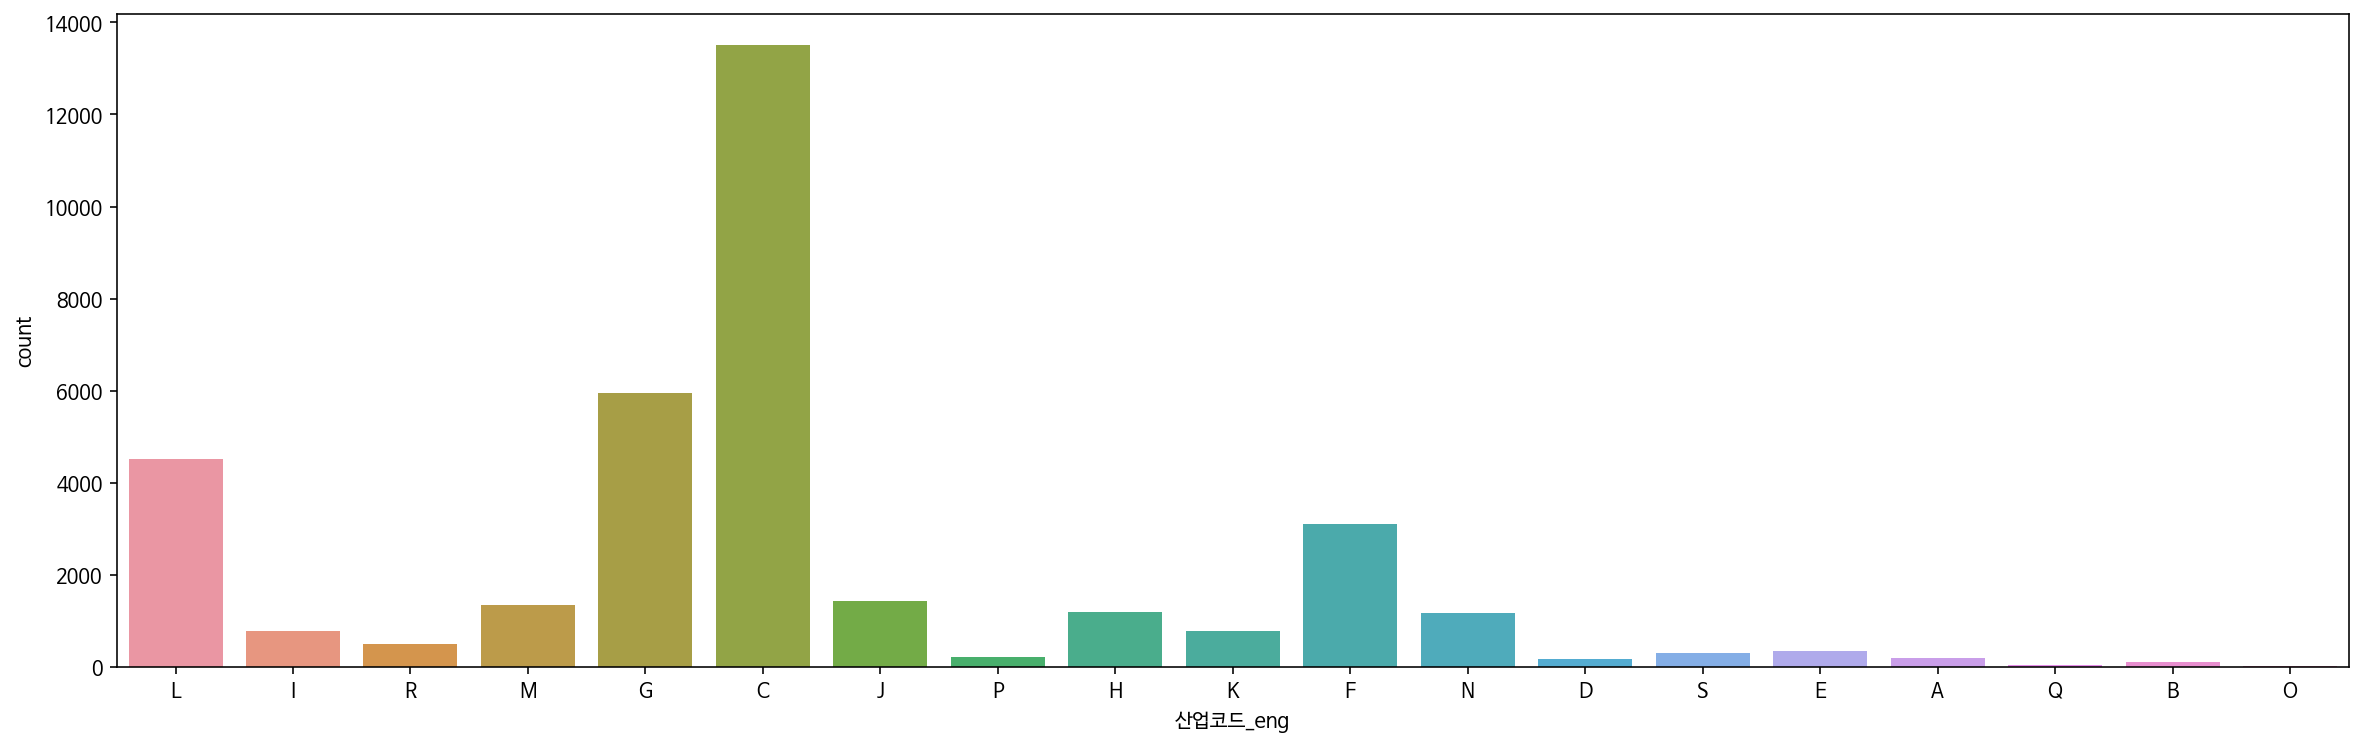

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='산업코드_eng', data=df)
plt.show()

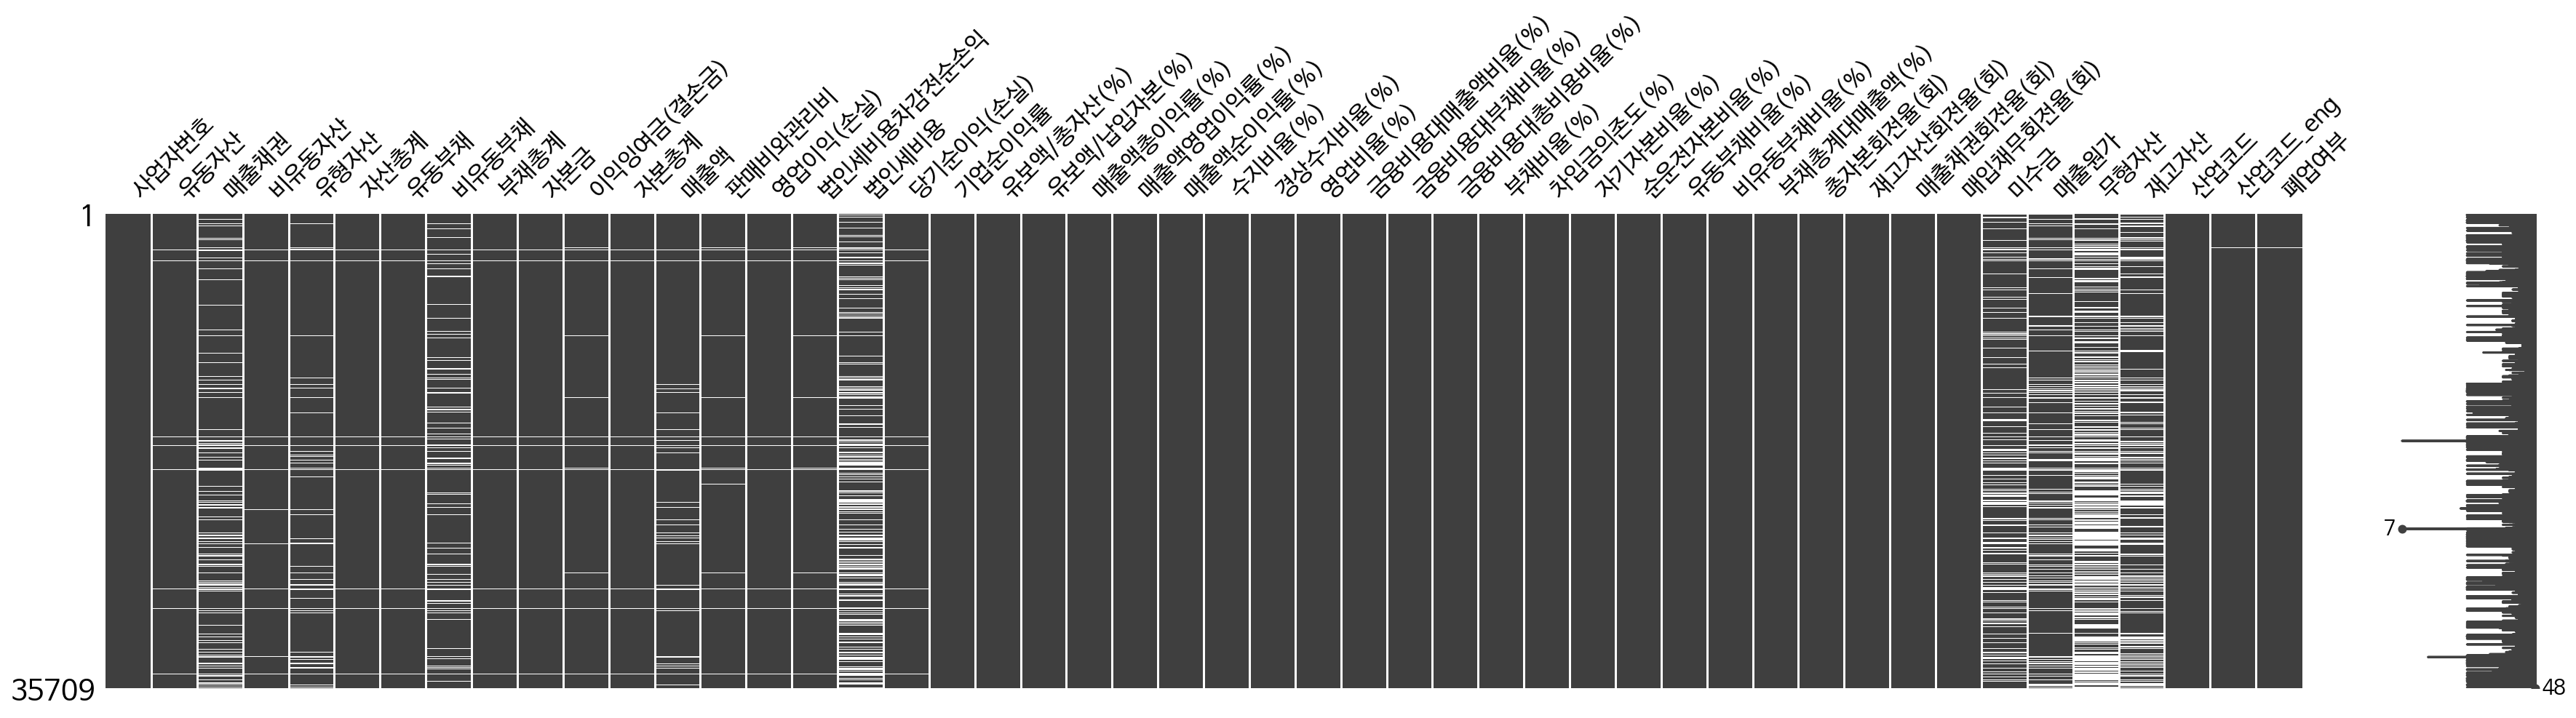

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(30,6))

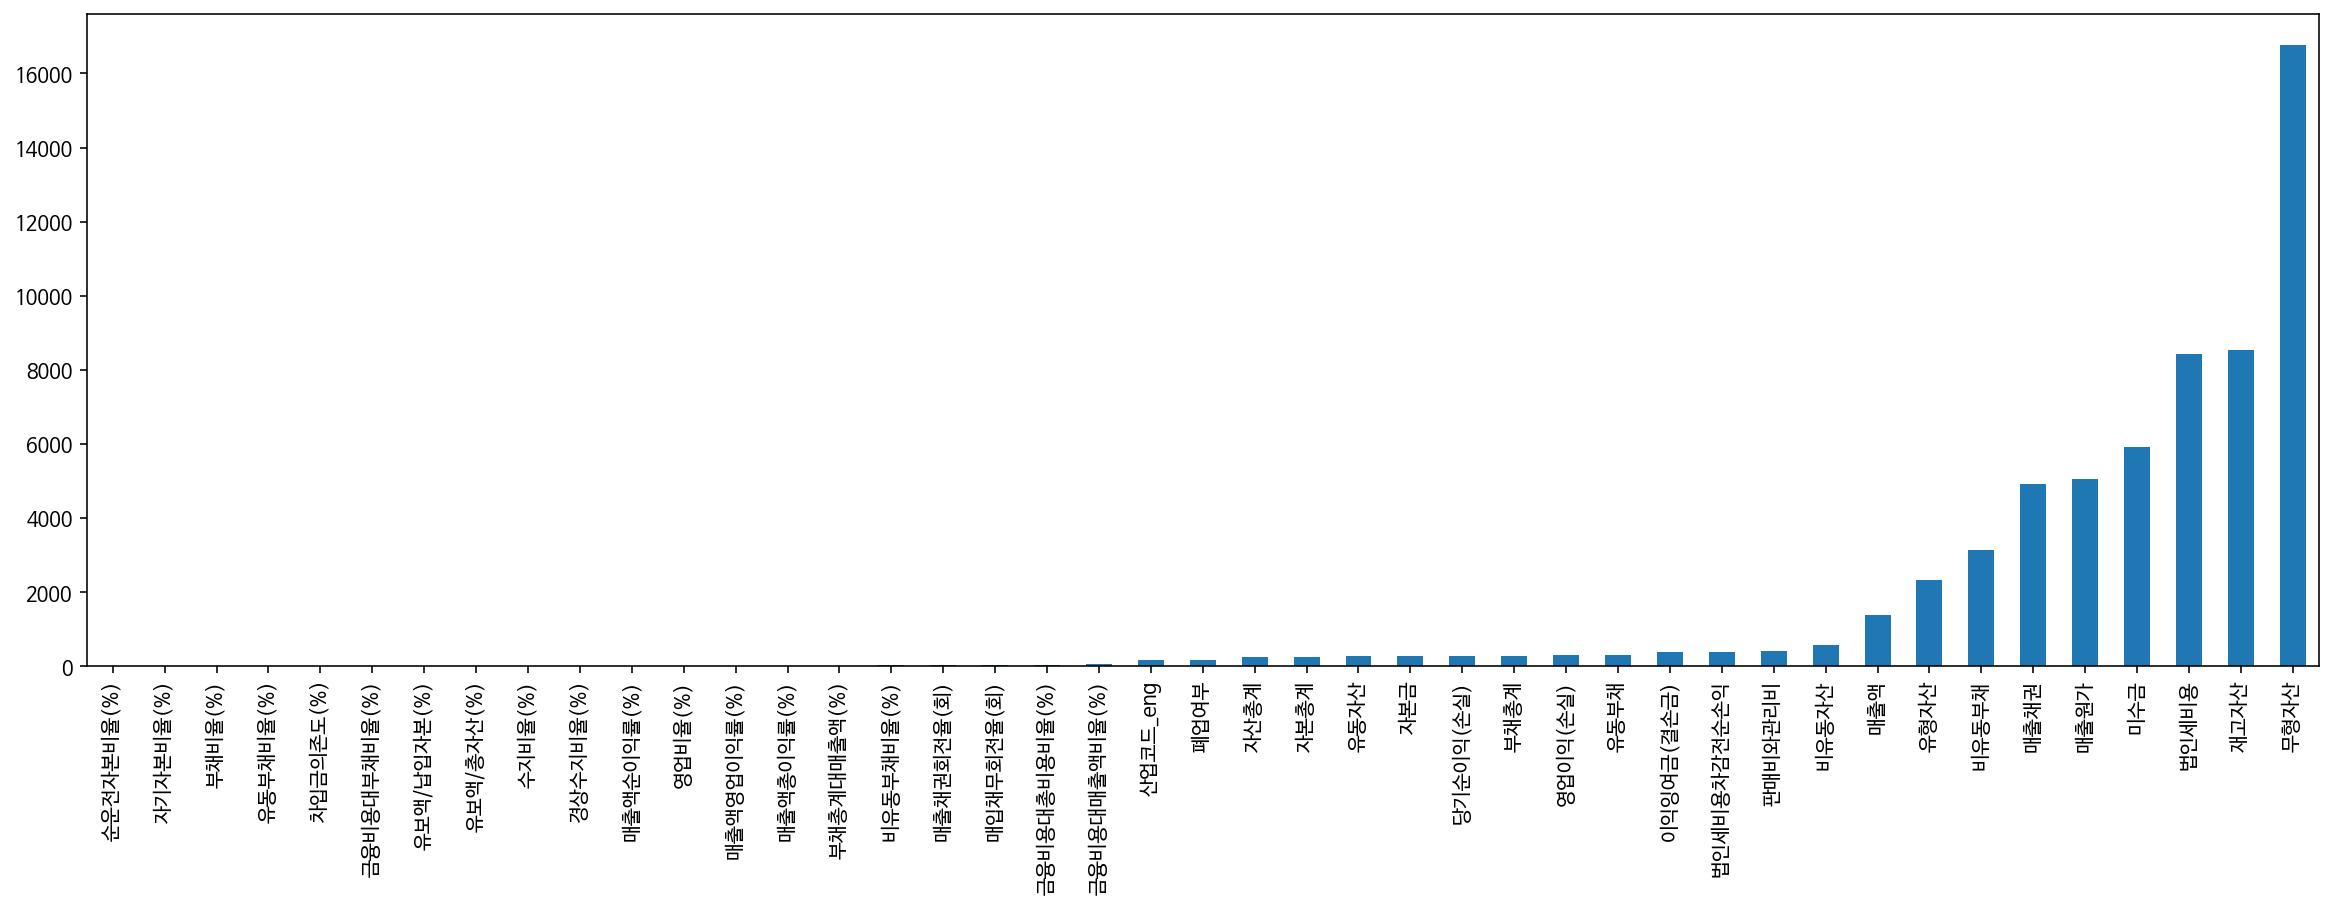

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (20,6))

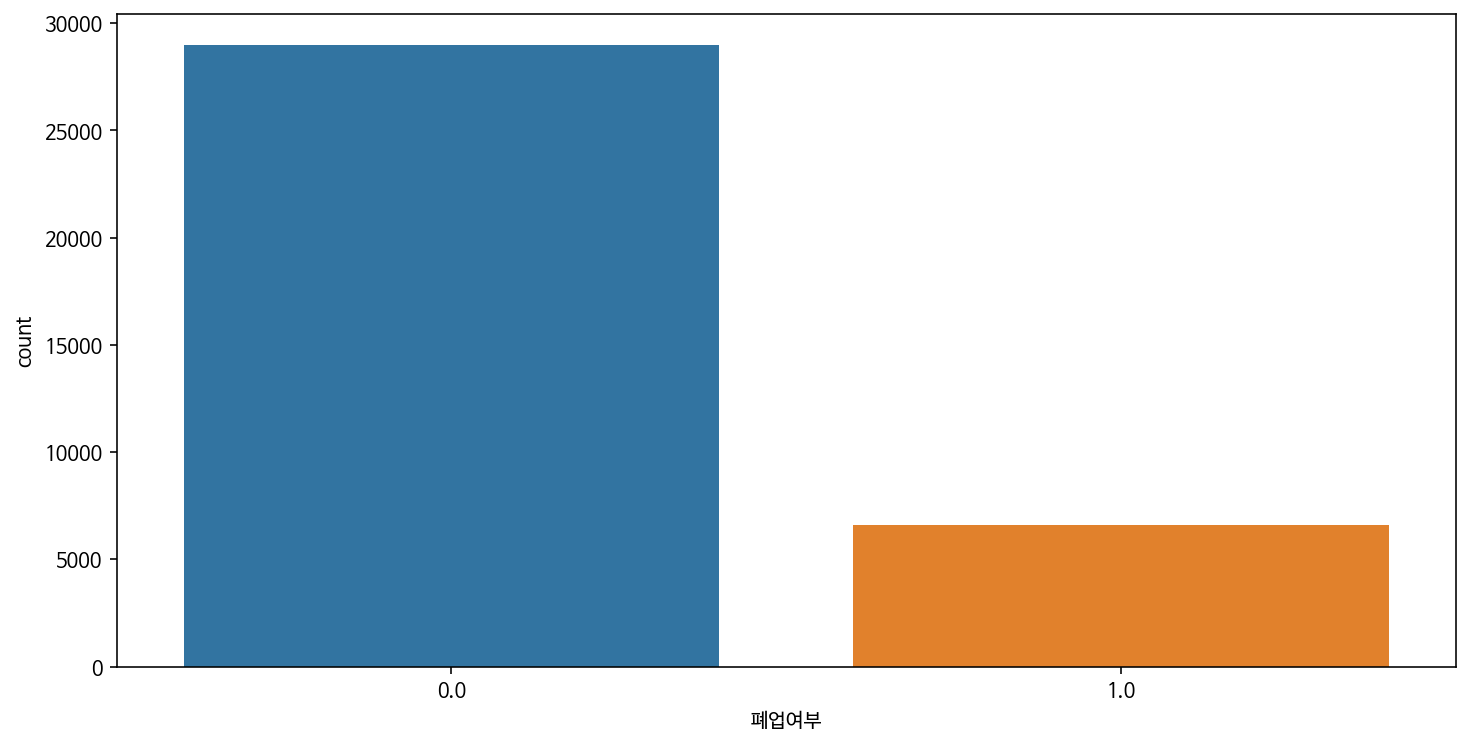

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='폐업여부', data=df)
plt.show()

In [ ]:
data_plus = pd.read_csv('/content/drive/MyDrive/데이터/대안적지표_re.csv') 
data_plus

,Unnamed: 0,고용허가제 외국인근로자 도입,산재신청 승인율,요양급여,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,A,1674.0,96.1,1.809245e+10,2.226734e+10,1.203473e+09,1.784673e+10,9.096039e+09,4.835836e+08,4.928656e+08,2.730537e+08,2.0,26314.0,226341.0
1,B,NaN,53.9,1.013970e+11,4.689138e+10,3.706777e+10,3.256810e+11,1.263570e+11,6.548795e+09,9.359212e+08,3.915039e+07,1.0,66340.0,42391.0
2,C,4806.0,90.7,3.772560e+11,4.595610e+11,3.405850e+10,7.678610e+11,1.962170e+11,7.491076e+09,1.455276e+10,7.556470e+09,954.0,26138635.0,240921707.0
3,D,NaN,90.1,2.280736e+09,9.975214e+08,6.211367e+08,5.694094e+09,5.764893e+09,1.687048e+08,3.146923e+08,1.198547e+07,1.0,29988.0,48880.0
4,E,NaN,90.1,2.280736e+09,9.975214e+08,6.211367e+08,5.694094e+09,5.764893e+09,1.687048e+08,3.146923e+08,1.198547e+07,1.0,29988.0,48880.0
5,F,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
6,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,180321.0,1205934.0
9,J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,5084288.0,42974571.0


In [ ]:
data_plus.rename(columns={'Unnamed: 0':'산업코드_eng'}, inplace=True)
data_plus.head()

,산업코드_eng,고용허가제 외국인근로자 도입,산재신청 승인율,요양급여,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,A,1674.0,96.1,1.809245e+10,2.226734e+10,1.203473e+09,1.784673e+10,9.096039e+09,4.835836e+08,4.928656e+08,2.730537e+08,2.0,26314.0,226341.0
1,B,NaN,53.9,1.013970e+11,4.689138e+10,3.706777e+10,3.256810e+11,1.263570e+11,6.548795e+09,9.359212e+08,3.915039e+07,1.0,66340.0,42391.0
2,C,4806.0,90.7,3.772560e+11,4.595610e+11,3.405850e+10,7.678610e+11,1.962170e+11,7.491076e+09,1.455276e+10,7.556470e+09,954.0,26138635.0,240921707.0
3,D,NaN,90.1,2.280736e+09,9.975214e+08,6.211367e+08,5.694094e+09,5.764893e+09,1.687048e+08,3.146923e+08,1.198547e+07,1.0,29988.0,48880.0
4,E,NaN,90.1,2.280736e+09,9.975214e+08,6.211367e+08,5.694094e+09,5.764893e+09,1.687048e+08,3.146923e+08,1.198547e+07,1.0,29988.0,48880.0


In [ ]:
dff = df.copy()

In [ ]:
dff['폐업여부'].isnull().sum()

161

In [ ]:
dff.drop(dff[dff['폐업여부'].isnull()].index,axis=0, inplace=True)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35709 entries, 0 to 35708
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사업자번호          35709 non-null  int64  
 1   유동자산           35443 non-null  float64
 2   매출채권           30800 non-null  float64
 3   비유동자산          35126 non-null  float64
 4   유형자산           33388 non-null  float64
 5   자산총계           35447 non-null  float64
 6   유동부채           35398 non-null  float64
 7   비유동부채          32563 non-null  float64
 8   부채총계           35422 non-null  float64
 9   자본금            35432 non-null  float64
 10  이익잉여금(결손금)     35322 non-null  float64
 11  자본총계           35445 non-null  float64
 12  매출액            34333 non-null  float64
 13  판매비와관리비        35301 non-null  float64
 14  영업이익(손실)       35416 non-null  float64
 15  법인세비용차감전순손익    35320 non-null  float64
 16  법인세비용          27293 non-null  float64
 17  당기순이익(손실)      35428 non-null  float64
 18  기업순이익률

In [ ]:
dff['폐업여부'] = dff['폐업여부'].astype('int')

In [ ]:
df_merge = pd.merge(dff, data_plus, on='산업코드_eng')
df_merge

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,1018100340,2.070964e+06,143384.75,3.549089e+07,1118160.75,3.756186e+07,5.333542e+06,10453503.00,1.578704e+07,7.211000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018101126,1.491190e+06,102136.25,3.550742e+07,34353222.50,3.699861e+07,8.974535e+06,3180149.00,1.215468e+07,1.539640e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1018101242,5.428135e+05,144011.75,2.465907e+07,22009393.00,2.520188e+07,6.706615e+06,2318500.00,9.025115e+06,4.500000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1018103819,1.667547e+06,48041.25,1.150967e+07,11086486.50,1.317722e+07,6.715410e+06,1568217.75,8.283628e+06,5.000000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1018117254,5.762378e+05,78056.25,4.985173e+07,9527462.25,5.042796e+07,3.133778e+05,8143208.25,8.456586e+06,1.094250e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,2108510761,8.639597e+07,19887419.00,3.149718e+07,5990573.00,1.178932e+08,7.483759e+07,30633852.00,1.054714e+08,1.200000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35544,2118825706,4.764439e+06,1961091.75,1.451981e+06,81196.00,6.216420e+06,2.962846e+06,1212244.75,4.175091e+06,1.600000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35545,3128612515,3.263704e+06,86510.00,1.007745e+08,99042472.00,1.040382e+08,9.558654e+06,218004.00,9.776658e+06,9.476893e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35546,3238801633,1.159971e+07,3610706.50,1.192185e+06,191599.00,1.279190e+07,5.170513e+06,153226.00,5.323739e+06,1.066667e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35548 entries, 0 to 35547
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             35282 non-null  float64
 1   매출채권             30654 non-null  float64
 2   비유동자산            34966 non-null  float64
 3   유형자산             33236 non-null  float64
 4   자산총계             35286 non-null  float64
 5   유동부채             35237 non-null  float64
 6   비유동부채            32430 non-null  float64
 7   부채총계             35261 non-null  float64
 8   자본금              35271 non-null  float64
 9   이익잉여금(결손금)       35165 non-null  float64
 10  자본총계             35284 non-null  float64
 11  매출액              34177 non-null  float64
 12  판매비와관리비          35144 non-null  float64
 13  영업이익(손실)         35255 non-null  float64
 14  법인세비용차감전순손익      35163 non-null  float64
 15  법인세비용            27182 non-null  float64
 16  당기순이익(손실)        35267 non-null  float64
 17  기업순이익률      

In [ ]:
df_merge.isnull().sum()/35548*100

유동자산                0.748284
매출채권               13.767301
비유동자산               1.637223
유형자산                6.503882
자산총계                0.737032
유동부채                0.874873
비유동부채               8.771239
부채총계                0.807359
자본금                 0.779228
이익잉여금(결손금)          1.077416
자본총계                0.742658
매출액                 3.856757
판매비와관리비             1.136492
영업이익(손실)            0.824238
법인세비용차감전순손익         1.083043
법인세비용              23.534376
당기순이익(손실)           0.790480
기업순이익률              0.000000
유보액/총자산(%)          0.011252
유보액/납입자본(%)         0.011252
매출액총이익률(%)          0.056262
매출액영업이익률(%)         0.056262
매출액순이익률(%)          0.056262
수지비율(%)             0.022505
경상수지비율(%)           0.033757
영업비율(%)             0.056262
금융비용대매출액비율(%)       0.160347
금융비용대부채비율(%)        0.008439
금융비용대총비용비율(%)       0.137842
부채비율(%)             0.005626
차입금의존도(%)           0.008439
자기자본비율(%)           0.005626
순운전자본비율(%)          0.005626
유동부채비율(%)           0.008439
비유동부채비율(%)    

In [ ]:
dff_merge = df_merge.copy()
dff_merge = dff_merge.fillna(0)
dff_merge = dff_merge.replace('NaN', 0)
dff_merge

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,1018100340,2.070964e+06,143384.75,3.549089e+07,1118160.75,3.756186e+07,5.333542e+06,10453503.00,1.578704e+07,7.211000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1018101126,1.491190e+06,102136.25,3.550742e+07,34353222.50,3.699861e+07,8.974535e+06,3180149.00,1.215468e+07,1.539640e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1018101242,5.428135e+05,144011.75,2.465907e+07,22009393.00,2.520188e+07,6.706615e+06,2318500.00,9.025115e+06,4.500000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1018103819,1.667547e+06,48041.25,1.150967e+07,11086486.50,1.317722e+07,6.715410e+06,1568217.75,8.283628e+06,5.000000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1018117254,5.762378e+05,78056.25,4.985173e+07,9527462.25,5.042796e+07,3.133778e+05,8143208.25,8.456586e+06,1.094250e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,2108510761,8.639597e+07,19887419.00,3.149718e+07,5990573.00,1.178932e+08,7.483759e+07,30633852.00,1.054714e+08,1.200000e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35544,2118825706,4.764439e+06,1961091.75,1.451981e+06,81196.00,6.216420e+06,2.962846e+06,1212244.75,4.175091e+06,1.600000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35545,3128612515,3.263704e+06,86510.00,1.007745e+08,99042472.00,1.040382e+08,9.558654e+06,218004.00,9.776658e+06,9.476893e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35546,3238801633,1.159971e+07,3610706.50,1.192185e+06,191599.00,1.279190e+07,5.170513e+06,153226.00,5.323739e+06,1.066667e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dff_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35548 entries, 0 to 35547
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   사업자번호            35548 non-null  int64  
 1   유동자산             35548 non-null  float64
 2   매출채권             35548 non-null  float64
 3   비유동자산            35548 non-null  float64
 4   유형자산             35548 non-null  float64
 5   자산총계             35548 non-null  float64
 6   유동부채             35548 non-null  float64
 7   비유동부채            35548 non-null  float64
 8   부채총계             35548 non-null  float64
 9   자본금              35548 non-null  float64
 10  이익잉여금(결손금)       35548 non-null  float64
 11  자본총계             35548 non-null  float64
 12  매출액              35548 non-null  float64
 13  판매비와관리비          35548 non-null  float64
 14  영업이익(손실)         35548 non-null  float64
 15  법인세비용차감전순손익      35548 non-null  float64
 16  법인세비용            35548 non-null  float64
 17  당기순이익(손실)   

In [ ]:
# 사업자번호 없는 데이터
# dff_merge = pd.read_csv('/content/drive/MyDrive/데이터/[유림] 결합코드.csv') 
# dff_merge

,Unnamed: 0,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,0,2.070964e+06,143384.75,3.549089e+07,1118160.75,3.756186e+07,5.333542e+06,10453503.00,1.578704e+07,7.211000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.491190e+06,102136.25,3.550742e+07,34353222.50,3.699861e+07,8.974535e+06,3180149.00,1.215468e+07,1.539640e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5.428135e+05,144011.75,2.465907e+07,22009393.00,2.520188e+07,6.706615e+06,2318500.00,9.025115e+06,4.500000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.667547e+06,48041.25,1.150967e+07,11086486.50,1.317722e+07,6.715410e+06,1568217.75,8.283628e+06,5.000000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.762378e+05,78056.25,4.985173e+07,9527462.25,5.042796e+07,3.133778e+05,8143208.25,8.456586e+06,1.094250e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,35543,8.639597e+07,19887419.00,3.149718e+07,5990573.00,1.178932e+08,7.483759e+07,30633852.00,1.054714e+08,1.200000e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35544,35544,4.764439e+06,1961091.75,1.451981e+06,81196.00,6.216420e+06,2.962846e+06,1212244.75,4.175091e+06,1.600000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35545,35545,3.263704e+06,86510.00,1.007745e+08,99042472.00,1.040382e+08,9.558654e+06,218004.00,9.776658e+06,9.476893e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35546,35546,1.159971e+07,3610706.50,1.192185e+06,191599.00,1.279190e+07,5.170513e+06,153226.00,5.323739e+06,1.066667e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dff_merge.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dff_merge

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,1018100340,2.070964e+06,143384.75,3.549089e+07,1118160.75,3.756186e+07,5.333542e+06,10453503.00,1.578704e+07,7.211000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1018101126,1.491190e+06,102136.25,3.550742e+07,34353222.50,3.699861e+07,8.974535e+06,3180149.00,1.215468e+07,1.539640e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1018101242,5.428135e+05,144011.75,2.465907e+07,22009393.00,2.520188e+07,6.706615e+06,2318500.00,9.025115e+06,4.500000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1018103819,1.667547e+06,48041.25,1.150967e+07,11086486.50,1.317722e+07,6.715410e+06,1568217.75,8.283628e+06,5.000000e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1018117254,5.762378e+05,78056.25,4.985173e+07,9527462.25,5.042796e+07,3.133778e+05,8143208.25,8.456586e+06,1.094250e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,2108510761,8.639597e+07,19887419.00,3.149718e+07,5990573.00,1.178932e+08,7.483759e+07,30633852.00,1.054714e+08,1.200000e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35544,2118825706,4.764439e+06,1961091.75,1.451981e+06,81196.00,6.216420e+06,2.962846e+06,1212244.75,4.175091e+06,1.600000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35545,3128612515,3.263704e+06,86510.00,1.007745e+08,99042472.00,1.040382e+08,9.558654e+06,218004.00,9.776658e+06,9.476893e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35546,3238801633,1.159971e+07,3610706.50,1.192185e+06,191599.00,1.279190e+07,5.170513e+06,153226.00,5.323739e+06,1.066667e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 일부업종만

In [ ]:
dt = dff_merge[(dff_merge['산업코드_eng'] == 'C') | (dff_merge['산업코드_eng'] == 'G' )|(dff_merge['산업코드_eng'] == 'F')|(dff_merge['산업코드_eng'] == 'J')|(dff_merge['산업코드_eng'] == 'M')]
dt

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
5781,1018104991,5466021.50,1633664.00,4158833.00,1126269.25,9624854.50,3607055.00,4205618.50,7812673.50,866710.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,95.0,2261407.0,42359450.0
5782,1018135422,2722000.00,1088000.00,1843000.00,1245000.00,4565000.00,243000.00,2396000.00,2639000.00,150000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,95.0,2261407.0,42359450.0
5783,1018151742,38283337.50,1837755.75,7289363.75,92051.00,45572701.25,42226801.25,868398.75,43095200.00,50000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,95.0,2261407.0,42359450.0
5784,1018164820,16916278.50,1351129.00,1569708.50,286668.50,18485986.75,5421770.00,14295271.00,19717040.75,225000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,95.0,2261407.0,42359450.0
5785,1018173159,19535749.50,766691.50,1324708.00,154110.00,20860457.50,23247529.75,366396.00,23613925.75,190000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,95.0,2261407.0,42359450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33252,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
33253,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
33254,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
33255,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25293 entries, 5781 to 33256
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             25293 non-null  float64
 1   매출채권             25293 non-null  float64
 2   비유동자산            25293 non-null  float64
 3   유형자산             25293 non-null  float64
 4   자산총계             25293 non-null  float64
 5   유동부채             25293 non-null  float64
 6   비유동부채            25293 non-null  float64
 7   부채총계             25293 non-null  float64
 8   자본금              25293 non-null  float64
 9   이익잉여금(결손금)       25293 non-null  float64
 10  자본총계             25293 non-null  float64
 11  매출액              25293 non-null  float64
 12  판매비와관리비          25293 non-null  float64
 13  영업이익(손실)         25293 non-null  float64
 14  법인세비용차감전순손익      25293 non-null  float64
 15  법인세비용            25293 non-null  float64
 16  당기순이익(손실)        25293 non-null  float64
 17  기업순이익률   

In [ ]:
dt.isnull().sum()

유동자산               0
매출채권               0
비유동자산              0
유형자산               0
자산총계               0
유동부채               0
비유동부채              0
부채총계               0
자본금                0
이익잉여금(결손금)         0
자본총계               0
매출액                0
판매비와관리비            0
영업이익(손실)           0
법인세비용차감전순손익        0
법인세비용              0
당기순이익(손실)          0
기업순이익률             0
유보액/총자산(%)         0
유보액/납입자본(%)        0
매출액총이익률(%)         0
매출액영업이익률(%)        0
매출액순이익률(%)         0
수지비율(%)            0
경상수지비율(%)          0
영업비율(%)            0
금융비용대매출액비율(%)      0
금융비용대부채비율(%)       0
금융비용대총비용비율(%)      0
부채비율(%)            0
차입금의존도(%)          0
자기자본비율(%)          0
순운전자본비율(%)         0
유동부채비율(%)          0
비유동부채비율(%)         0
부채총계대매출액(%)        0
총자본회전율(회)          0
재고자산회전율(회)         0
매출채권회전율(회)         0
매입채무회전율(회)         0
미수금                0
매출원가               0
무형자산               0
재고자산               0
산업코드               0
산업코드_eng           0
폐업여부               0
고용허가제 외국인근로자 

In [ ]:
dt[dt['요양급여'] == 0]

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,이익잉여금(결손금),...,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
5781,5466021.50,1.633664e+06,4158833.00,1.126269e+06,9624854.50,3.607055e+06,4205618.50,7.812674e+06,866710.0,-1.489520e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,2261407.0,42359450.0
5782,2722000.00,1.088000e+06,1843000.00,1.245000e+06,4565000.00,2.430000e+05,2396000.00,2.639000e+06,150000.0,1.293000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,2261407.0,42359450.0
5783,38283337.50,1.837756e+06,7289363.75,9.205100e+04,45572701.25,4.222680e+07,868398.75,4.309520e+07,50000.0,2.427501e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,2261407.0,42359450.0
5784,16916278.50,1.351129e+06,1569708.50,2.866685e+05,18485986.75,5.421770e+06,14295271.00,1.971704e+07,225000.0,-1.456054e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,2261407.0,42359450.0
5785,19535749.50,7.666915e+05,1324708.00,1.541100e+05,20860457.50,2.324753e+07,366396.00,2.361393e+07,190000.0,-2.943468e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,2261407.0,42359450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27974,2773244.00,1.770494e+06,5799033.00,5.743485e+06,8572277.00,2.712067e+06,5753854.50,6.547970e+06,50000.0,1.973875e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,5084288.0,42974571.0
27975,2972624.50,7.151095e+05,10162960.50,1.780870e+05,13135585.00,5.152042e+06,6830969.50,1.198301e+07,500000.0,-3.994775e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,5084288.0,42974571.0
27976,2996465.50,2.866309e+06,336132.00,1.978260e+05,3332597.50,2.919438e+06,0.00,2.919438e+06,50000.0,3.631600e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,5084288.0,42974571.0
27977,6423911.75,1.680234e+06,12092074.50,3.294468e+05,18515986.50,1.315262e+07,1576597.25,1.472922e+07,450000.0,8.543562e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,5084288.0,42974571.0


In [ ]:
from sklearn.model_selection import train_test_split

x = pd.concat([dt.iloc[:,:44],dt.iloc[:,47:]], axis=1)
X = x.to_numpy()
target = dt['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [ ]:
len(X_scaled)

25293

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
!pip install unidecode
import unidecode
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report, roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 13.9 MB/s 


In [ ]:
#XGboost 모델 구축하기
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30,missing=None)
clf_xgb.fit(train_input,
            train_target,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input, test_target)])

[0]	validation_0-aucpr:0.907041
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.908729
[2]	validation_0-aucpr:0.912305
[3]	validation_0-aucpr:0.915699
[4]	validation_0-aucpr:0.91911
[5]	validation_0-aucpr:0.922061
[6]	validation_0-aucpr:0.922221
[7]	validation_0-aucpr:0.922538
[8]	validation_0-aucpr:0.924122
[9]	validation_0-aucpr:0.925888
[10]	validation_0-aucpr:0.926742
[11]	validation_0-aucpr:0.92759
[12]	validation_0-aucpr:0.927828
[13]	validation_0-aucpr:0.927845
[14]	validation_0-aucpr:0.927802
[15]	validation_0-aucpr:0.928216
[16]	validation_0-aucpr:0.928654
[17]	validation_0-aucpr:0.930108
[18]	validation_0-aucpr:0.931304
[19]	validation_0-aucpr:0.931251
[20]	validation_0-aucpr:0.931612
[21]	validation_0-aucpr:0.931605
[22]	validation_0-aucpr:0.931625
[23]	validation_0-aucpr:0.931719
[24]	validation_0-aucpr:0.931655
[25]	validation_0-aucpr:0.931837
[26]	validation_0-aucpr:0.932039
[27]	validation_0-aucpr:0.932566
[28]	validation_0-aucp

XGBClassifier(max_depth=30)

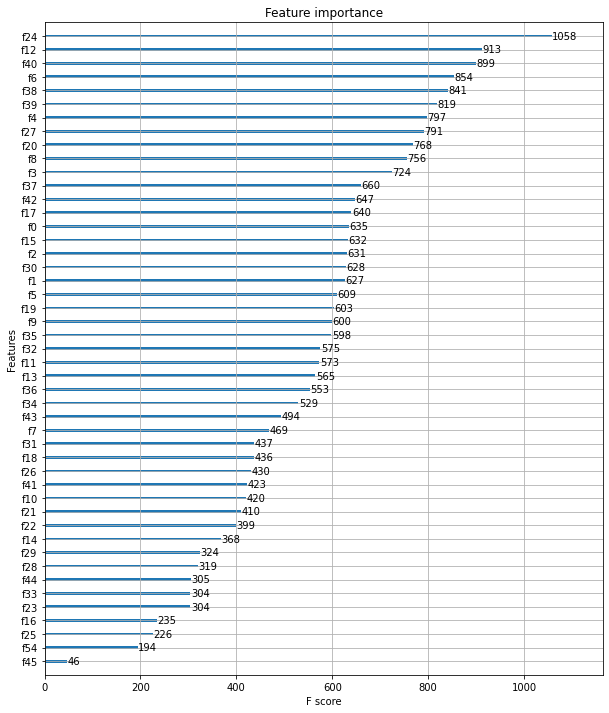

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb, ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


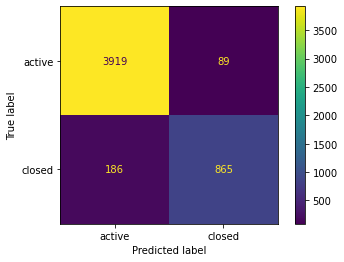

In [ ]:
plot_confusion_matrix(clf_xgb,
                      test_input,
                      test_target,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs = clf_xgb.predict(test_input)

In [ ]:
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]
print(confusion_matrix(test_target, y_preds))
print(classification_report(test_target, y_preds))
print(roc_auc_score(test_target, y_preds))

[[3919   89]
 [ 186  865]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4008
           1       0.91      0.82      0.86      1051

    accuracy                           0.95      5059
   macro avg       0.93      0.90      0.91      5059
weighted avg       0.94      0.95      0.94      5059

0.9004100504984324


## +온실가스

In [ ]:
gas = pd.read_csv('/content/drive/MyDrive/데이터/Gas.csv') 
gas

,IND_CD1,number,Gas,Energy
0,P,13,727275,14897
1,H,3,514328,10180
2,Q,5,331272,6731
3,K,1,66825,911
4,L,4,171192,3497
...,...,...,...,...
98,H,1,51432,705
99,E,8,554517,5229
100,E,6,349615,2117
101,E,4,163541,1410


In [ ]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   IND_CD1  103 non-null    object
 1   number   103 non-null    int64 
 2   Gas      103 non-null    int64 
 3   Energy   103 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [ ]:
dt_gas = gas.groupby('IND_CD1').sum()
dt_gas['Gas_avg'] = dt_gas['Gas'] / dt_gas['number']
dt_gas['Energy_avg'] = dt_gas['Energy'] / dt_gas['number']
dt_gas

,number,Gas,Energy,Gas_avg,Energy_avg
IND_CD1,,,,,
A,4,181060,3883,4.526500e+04,970.750000
C,689,318293866,3735058,4.619650e+05,5420.984035
D,60,236002256,3183207,3.933371e+06,53053.450000
E,92,14909183,98967,1.620563e+05,1075.728261
F,61,1847657,34543,3.028946e+04,566.278689
G,6,2049938,41302,3.416563e+05,6883.666667
H,107,7602647,131510,7.105278e+04,1229.065421
I,4,228786,4594,5.719650e+04,1148.500000
J,10,4149918,85198,4.149918e+05,8519.800000


In [ ]:
dt_gas = dt_gas.reset_index()
dt_gas

,IND_CD1,number,Gas,Energy,Gas_avg,Energy_avg
0,A,4,181060,3883,4.526500e+04,970.750000
1,C,689,318293866,3735058,4.619650e+05,5420.984035
2,D,60,236002256,3183207,3.933371e+06,53053.450000
3,E,92,14909183,98967,1.620563e+05,1075.728261
4,F,61,1847657,34543,3.028946e+04,566.278689
5,G,6,2049938,41302,3.416563e+05,6883.666667
6,H,107,7602647,131510,7.105278e+04,1229.065421
7,I,4,228786,4594,5.719650e+04,1148.500000
8,J,10,4149918,85198,4.149918e+05,8519.800000
9,K,1,66825,911,6.682500e+04,911.000000


In [ ]:
dt_gas = dt_gas.rename(columns={'IND_CD1':'산업코드_eng'})
dt_gas

,산업코드_eng,number,Gas,Energy,Gas_avg,Energy_avg
0,A,4,181060,3883,4.526500e+04,970.750000
1,C,689,318293866,3735058,4.619650e+05,5420.984035
2,D,60,236002256,3183207,3.933371e+06,53053.450000
3,E,92,14909183,98967,1.620563e+05,1075.728261
4,F,61,1847657,34543,3.028946e+04,566.278689
5,G,6,2049938,41302,3.416563e+05,6883.666667
6,H,107,7602647,131510,7.105278e+04,1229.065421
7,I,4,228786,4594,5.719650e+04,1148.500000
8,J,10,4149918,85198,4.149918e+05,8519.800000
9,K,1,66825,911,6.682500e+04,911.000000


In [ ]:
dtt_gas = dt_gas.drop(['number', 'Gas', 'Energy'], axis=1)
dtt_gas

,산업코드_eng,Gas_avg,Energy_avg
0,A,4.526500e+04,970.750000
1,C,4.619650e+05,5420.984035
2,D,3.933371e+06,53053.450000
3,E,1.620563e+05,1075.728261
4,F,3.028946e+04,566.278689
5,G,3.416563e+05,6883.666667
6,H,7.105278e+04,1229.065421
7,I,5.719650e+04,1148.500000
8,J,4.149918e+05,8519.800000
9,K,6.682500e+04,911.000000


In [ ]:
dt_merge_gas = pd.merge(dt, dtt_gas, on='산업코드_eng')
dt_merge_gas

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액,Gas_avg,Energy_avg
0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23954,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23955,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23956,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689


In [ ]:
dt_merge_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23958 entries, 0 to 23957
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   사업자번호            23958 non-null  int64  
 1   유동자산             23958 non-null  float64
 2   매출채권             23958 non-null  float64
 3   비유동자산            23958 non-null  float64
 4   유형자산             23958 non-null  float64
 5   자산총계             23958 non-null  float64
 6   유동부채             23958 non-null  float64
 7   비유동부채            23958 non-null  float64
 8   부채총계             23958 non-null  float64
 9   자본금              23958 non-null  float64
 10  이익잉여금(결손금)       23958 non-null  float64
 11  자본총계             23958 non-null  float64
 12  매출액              23958 non-null  float64
 13  판매비와관리비          23958 non-null  float64
 14  영업이익(손실)         23958 non-null  float64
 15  법인세비용차감전순손익      23958 non-null  float64
 16  법인세비용            23958 non-null  float64
 17  당기순이익(손실)   

In [ ]:
dt_merge_gas

In [ ]:
사업자 번호 없는 데이터
data = pd.read_csv('/content/drive/MyDrive/데이터/최종결합data(C,G,F,J,M).csv') 
data

,Unnamed: 0,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액,Gas_avg,Energy_avg
0,0,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
1,1,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
2,2,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
3,3,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
4,4,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,23953,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23954,23954,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23955,23955,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23956,23956,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23958 entries, 0 to 23957
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             23958 non-null  float64
 1   매출채권             23958 non-null  float64
 2   비유동자산            23958 non-null  float64
 3   유형자산             23958 non-null  float64
 4   자산총계             23958 non-null  float64
 5   유동부채             23958 non-null  float64
 6   비유동부채            23958 non-null  float64
 7   부채총계             23958 non-null  float64
 8   자본금              23958 non-null  float64
 9   이익잉여금(결손금)       23958 non-null  float64
 10  자본총계             23958 non-null  float64
 11  매출액              23958 non-null  float64
 12  판매비와관리비          23958 non-null  float64
 13  영업이익(손실)         23958 non-null  float64
 14  법인세비용차감전순손익      23958 non-null  float64
 15  법인세비용            23958 non-null  float64
 16  당기순이익(손실)        23958 non-null  float64
 17  기업순이익률      

In [ ]:
data['산업코드_eng'].value_counts()

C    13503
G     5941
F     3095
J     1419
Name: 산업코드_eng, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
!pip install unidecode
import unidecode
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report, roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.4 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split

x = pd.concat([data.iloc[:,:44],data.iloc[:,47:]], axis=1)
X = x.to_numpy()
target = data['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [ ]:
len(X_scaled)

23958

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
#XGboost 모델 구축하기
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30,missing=None)
clf_xgb.fit(train_input,
            train_target,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input, test_target)])

[0]	validation_0-aucpr:0.916003
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.918647
[2]	validation_0-aucpr:0.925883
[3]	validation_0-aucpr:0.928207
[4]	validation_0-aucpr:0.930993
[5]	validation_0-aucpr:0.931745
[6]	validation_0-aucpr:0.931701
[7]	validation_0-aucpr:0.932406
[8]	validation_0-aucpr:0.931892
[9]	validation_0-aucpr:0.932224
[10]	validation_0-aucpr:0.932264
[11]	validation_0-aucpr:0.932658
[12]	validation_0-aucpr:0.933404
[13]	validation_0-aucpr:0.933921
[14]	validation_0-aucpr:0.935061
[15]	validation_0-aucpr:0.934839
[16]	validation_0-aucpr:0.935369
[17]	validation_0-aucpr:0.935446
[18]	validation_0-aucpr:0.9356
[19]	validation_0-aucpr:0.935547
[20]	validation_0-aucpr:0.935927
[21]	validation_0-aucpr:0.935874
[22]	validation_0-aucpr:0.935976
[23]	validation_0-aucpr:0.936237
[24]	validation_0-aucpr:0.936276
[25]	validation_0-aucpr:0.936111
[26]	validation_0-aucpr:0.936448
[27]	validation_0-aucpr:0.936677
[28]	validation_0-aucp

XGBClassifier(max_depth=30)

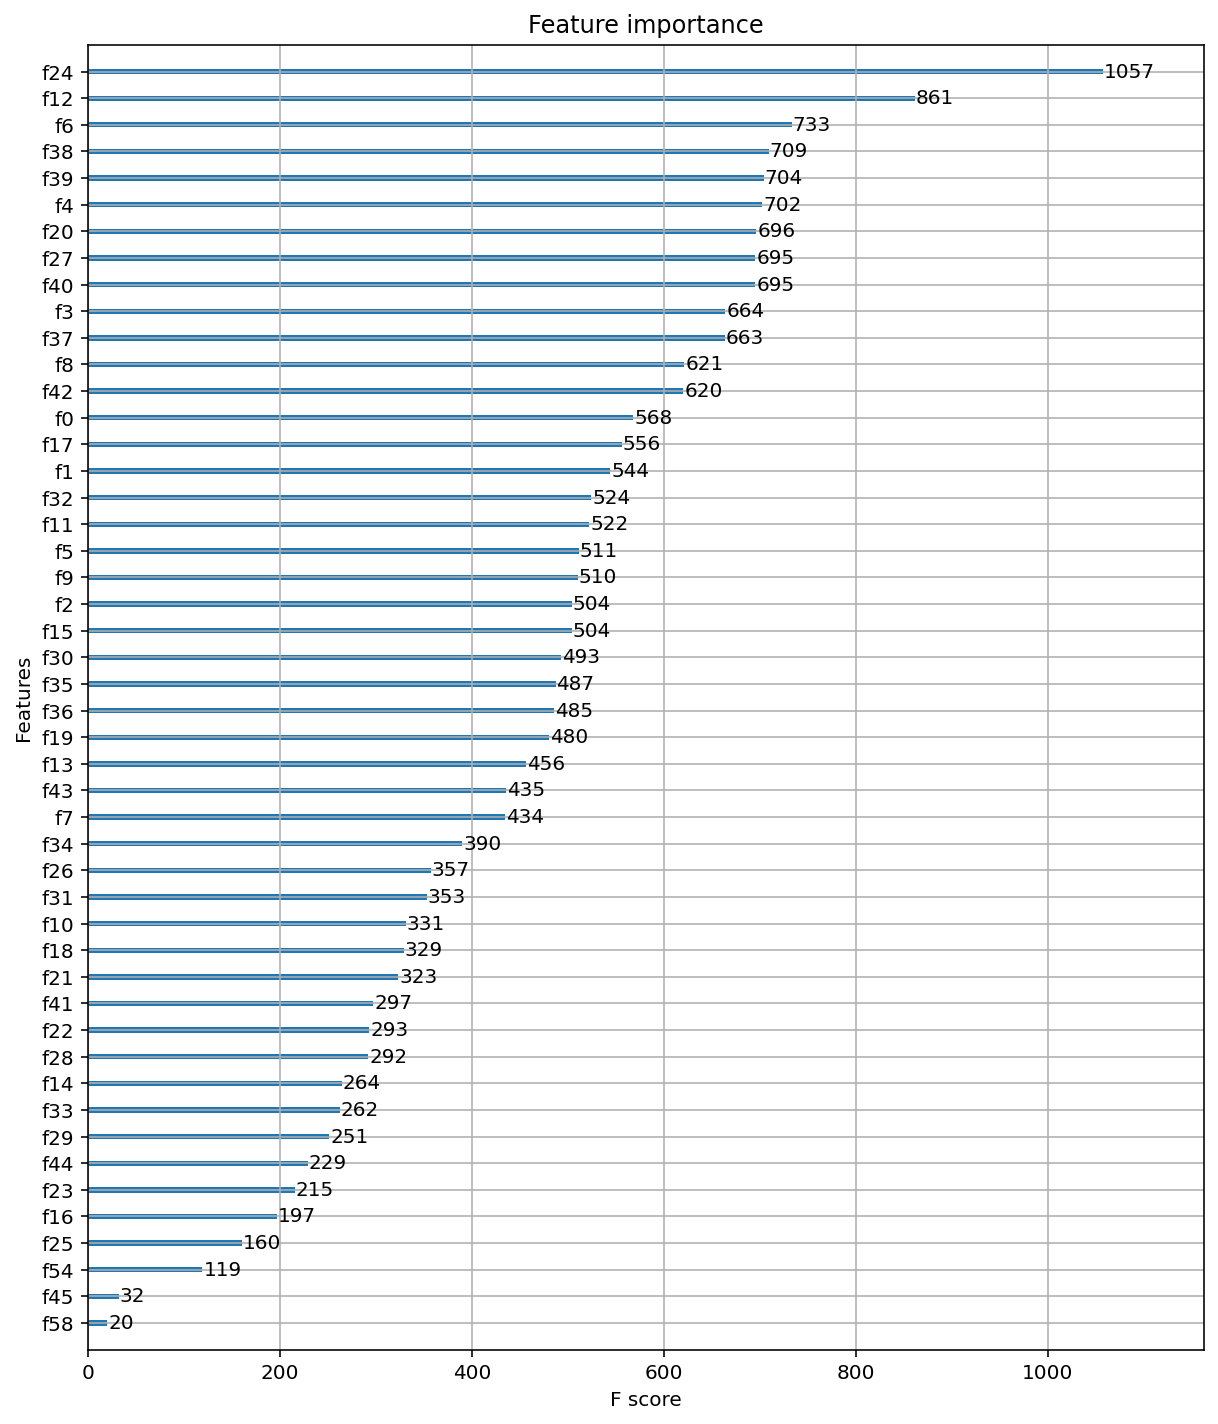

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


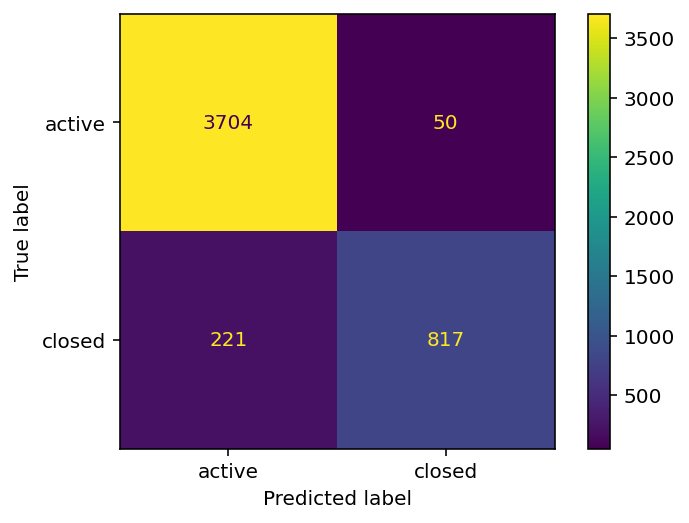

In [ ]:
plot_confusion_matrix(clf_xgb,
                      test_input,
                      test_target,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs = clf_xgb.predict(test_input)

In [ ]:
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]
print(confusion_matrix(test_target, y_preds))
print(classification_report(test_target, y_preds))
print(roc_auc_score(test_target, y_preds))

[[3704   50]
 [ 221  817]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3754
           1       0.94      0.79      0.86      1038

    accuracy                           0.94      4792
   macro avg       0.94      0.89      0.91      4792
weighted avg       0.94      0.94      0.94      4792

0.8868857162507713


## 재무데이터 일부만 활용

In [ ]:
# Feature 상위 5개
pd.concat([data.iloc[:,24],data.iloc[:,12],data.iloc[:,6],data.iloc[:,38],data.iloc[:,39],data.iloc[:,4]], axis=1)

,경상수지비율(%),판매비와관리비,비유동부채,매출채권회전율(회),매입채무회전율(회),자산총계
0,5.000000e+11,1004277.00,2439803.75,4.972250e+00,6.662750e+00,16074797.50
1,3.333332e+11,4559220.75,0.00,6.029500e+00,2.439925e+01,31293886.25
2,-2.256277e+06,7140499.00,255527.75,1.757450e+01,5.501550e+01,28785159.00
3,-1.731110e+05,6942176.50,1809475.50,4.694800e+01,4.448375e+01,14096374.00
4,-4.875953e+05,5629036.75,8892628.00,1.177040e+02,8.403250e+00,50238244.25
...,...,...,...,...,...,...
23953,5.225618e+04,6418462.00,25781781.00,1.000000e+12,1.000000e+12,30119654.50
23954,7.493594e+11,759811.50,36004.00,1.000000e+12,1.000000e+12,68629845.25
23955,1.237640e+02,528845.00,36503080.00,1.000000e+12,1.000000e+12,42899475.00
23956,5.144192e+06,1030386.50,11010083.50,1.000000e+12,1.000000e+12,15767760.50


In [ ]:
data.iloc[:,46]

0        0
1        0
2        0
3        0
4        0
        ..
23953    0
23954    0
23955    0
23956    0
23957    1
Name: 폐업여부, Length: 23958, dtype: int64

In [ ]:
data.iloc[:,47:]

,고용허가제 외국인근로자 도입,산재신청 승인율,요양급여,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액,Gas_avg,Energy_avg
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
1,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
2,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
3,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
4,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23954,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23955,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23956,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689


## +나이스 비즈 데이터 추가

In [ ]:
nice_biz = pd.read_csv('/content/drive/MyDrive/데이터/나이스 비즈인포 연봉현황.csv', encoding='cp949') 
nice_biz

,사업자번호,payroll,new_payroll,employment,resignation,cmp_years
0,1018100340,1,1,0.2353,0.2727,15
1,1018100772,1,1,0.0000,0.0000,53
2,1018101126,1,1,0.8000,0.6000,55
3,1018101242,1,1,0.1250,0.2500,15
4,1018103819,1,1,0.0000,0.0000,15
...,...,...,...,...,...,...
35704,8998700283,1,1,0.0000,0.0000,6
35705,8998701263,1,1,0.2353,0.2727,15
35706,8998800150,1,1,0.7368,0.9474,11
35707,8998800427,1,1,0.0625,0.5750,6


In [ ]:
dt_merge_gas

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액,Gas_avg,Energy_avg
0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23954,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23955,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23956,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689


In [ ]:
dt_nice = pd.merge(dt_merge_gas, nice_biz, on='사업자번호')
dt_nice

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액,Gas_avg,Energy_avg,payroll,new_payroll,employment,resignation,cmp_years
0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,0.0,0.0,0.0,341656.333333,6883.666667,1,1,0.2353,0.2727,15
1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,0.0,0.0,0.0,341656.333333,6883.666667,2,1,0.0930,0.0465,39
2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,0.0,0.0,0.0,341656.333333,6883.666667,1,1,0.3158,0.2368,35
3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,0.0,0.0,0.0,341656.333333,6883.666667,1,1,0.1636,0.2727,35
4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,0.0,0.0,0.0,341656.333333,6883.666667,1,1,0.3214,0.2143,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,25.0,902812.0,3266251.0,30289.459016,566.278689,1,1,0.2353,0.2727,15
23954,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,25.0,902812.0,3266251.0,30289.459016,566.278689,1,1,0.0000,0.2000,4
23955,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,25.0,902812.0,3266251.0,30289.459016,566.278689,1,1,1.0000,0.6667,3
23956,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,25.0,902812.0,3266251.0,30289.459016,566.278689,1,1,0.0000,0.0000,2


In [ ]:
dt_nice['산업코드_eng'].value_counts()

C    13503
G     5941
F     3095
J     1419
Name: 산업코드_eng, dtype: int64

C: 제조업 / G: 도소매업

In [ ]:
data_finance_5years = pd.read_csv('/content/drive/MyDrive/데이터/finance_5years.csv', encoding='cp949') 
data_finance_5years

,Unnamed: 0,BIZ_NO,자산총계,operation_date,EMP_CNT,long,new_col
0,1,1018100340,3.756186e+07,24049.0,41.0,1.0,0
1,2,1018100772,2.137594e+07,19341.0,3.0,1.0,0
2,3,1018101126,3.699861e+07,20040.0,13.0,1.0,0
3,4,1018101242,2.520188e+07,18942.0,17.0,1.0,0
4,5,1018103819,1.317722e+07,18946.0,4.0,1.0,0
...,...,...,...,...,...,...,...
35797,35798,8998700283,1.303263e+06,2147.0,5.0,1.0,1
35798,35799,8998701263,9.025398e+06,1172.0,2.0,0.0,1
35799,35800,8998800150,3.186404e+07,3962.0,106.0,1.0,0
35800,35801,8998800427,1.442572e+07,2283.0,59.0,1.0,0


In [ ]:
data_finance_5years = data_finance_5years.rename(columns={'BIZ_NO':'사업자번호','operation_date':'기업기간','EMP_CNT':'근로자수'})
data_finance_5years.drop(['Unnamed: 0', '자산총계', 'new_col','long'],axis=1,inplace=True)
data_finance_5years

,사업자번호,기업기간,근로자수
0,1018100340,24049.0,41.0
1,1018100772,19341.0,3.0
2,1018101126,20040.0,13.0
3,1018101242,18942.0,17.0
4,1018103819,18946.0,4.0
...,...,...,...
35797,8998700283,2147.0,5.0
35798,8998701263,1172.0,2.0
35799,8998800150,3962.0,106.0
35800,8998800427,2283.0,59.0


In [ ]:
dt_total = pd.merge(dt_nice, data_finance_5years, on='사업자번호')
dt_total

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,코스닥_시가총액,Gas_avg,Energy_avg,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수
0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,0.0,341656.333333,6883.666667,1,1,0.2353,0.2727,15,16146.0,13.0
1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,0.0,341656.333333,6883.666667,2,1,0.0930,0.0465,39,14195.0,44.0
2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,0.0,341656.333333,6883.666667,1,1,0.3158,0.2368,35,12974.0,78.0
3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,0.0,341656.333333,6883.666667,1,1,0.1636,0.2727,35,12801.0,58.0
4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,0.0,341656.333333,6883.666667,1,1,0.3214,0.2143,35,12783.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,3266251.0,30289.459016,566.278689,1,1,0.2353,0.2727,15,1236.0,2.0
24016,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,3266251.0,30289.459016,566.278689,1,1,0.0000,0.2000,4,1735.0,5.0
24017,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,3266251.0,30289.459016,566.278689,1,1,1.0000,0.6667,3,1159.0,4.0
24018,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,3266251.0,30289.459016,566.278689,1,1,0.0000,0.0000,2,879.0,3.0


In [ ]:
dt_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24020 entries, 0 to 24019
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   사업자번호            24020 non-null  int64  
 1   유동자산             24020 non-null  float64
 2   매출채권             24020 non-null  float64
 3   비유동자산            24020 non-null  float64
 4   유형자산             24020 non-null  float64
 5   자산총계             24020 non-null  float64
 6   유동부채             24020 non-null  float64
 7   비유동부채            24020 non-null  float64
 8   부채총계             24020 non-null  float64
 9   자본금              24020 non-null  float64
 10  이익잉여금(결손금)       24020 non-null  float64
 11  자본총계             24020 non-null  float64
 12  매출액              24020 non-null  float64
 13  판매비와관리비          24020 non-null  float64
 14  영업이익(손실)         24020 non-null  float64
 15  법인세비용차감전순손익      24020 non-null  float64
 16  법인세비용            24020 non-null  float64
 17  당기순이익(손실)   

In [ ]:
dt_total.to_csv('/content/drive/MyDrive/데이터/최종 결합 데이터(C,G,F,J).csv')

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/데이터/df_new.csv', encoding='cp949') 
df_new

,Unnamed: 0,기준고용률 미달비율,산업코드_eng,창업 어려움 정도
0,0,20.21,C,0.43
1,1,5.56,F,0.41
2,2,66.57,G,0.51
3,3,21.03,M,0.41
4,4,NaN,J,0.39


In [ ]:
df_new.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_new

,기준고용률 미달비율,산업코드_eng,창업 어려움 정도
0,20.21,C,0.43
1,5.56,F,0.41
2,66.57,G,0.51
3,21.03,M,0.41
4,NaN,J,0.39


In [ ]:
dtt_total = pd.merge(dt_total, df_new, on='산업코드_eng')
dtt_total

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,Energy_avg,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도
0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,6883.666667,1,1,0.2353,0.2727,15,16146.0,13.0,66.57,0.51
1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,6883.666667,2,1,0.0930,0.0465,39,14195.0,44.0,66.57,0.51
2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,6883.666667,1,1,0.3158,0.2368,35,12974.0,78.0,66.57,0.51
3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,6883.666667,1,1,0.1636,0.2727,35,12801.0,58.0,66.57,0.51
4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,6883.666667,1,1,0.3214,0.2143,35,12783.0,30.0,66.57,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,566.278689,1,1,0.2353,0.2727,15,1236.0,2.0,5.56,0.41
24016,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,566.278689,1,1,0.0000,0.2000,4,1735.0,5.0,5.56,0.41
24017,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,566.278689,1,1,1.0000,0.6667,3,1159.0,4.0,5.56,0.41
24018,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,566.278689,1,1,0.0000,0.0000,2,879.0,3.0,5.56,0.41


In [ ]:
dtt_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24020 entries, 0 to 24019
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   사업자번호            24020 non-null  int64  
 1   유동자산             24020 non-null  float64
 2   매출채권             24020 non-null  float64
 3   비유동자산            24020 non-null  float64
 4   유형자산             24020 non-null  float64
 5   자산총계             24020 non-null  float64
 6   유동부채             24020 non-null  float64
 7   비유동부채            24020 non-null  float64
 8   부채총계             24020 non-null  float64
 9   자본금              24020 non-null  float64
 10  이익잉여금(결손금)       24020 non-null  float64
 11  자본총계             24020 non-null  float64
 12  매출액              24020 non-null  float64
 13  판매비와관리비          24020 non-null  float64
 14  영업이익(손실)         24020 non-null  float64
 15  법인세비용차감전순손익      24020 non-null  float64
 16  법인세비용            24020 non-null  float64
 17  당기순이익(손실)   

In [ ]:
dtt_total.to_csv('/content/drive/MyDrive/데이터/최종 결합 데이터(C,G,F,J).csv')

# 최종 데이터

In [ ]:
total_data0 = pd.read_csv('/content/drive/MyDrive/데이터/최종 결합 데이터(C,G,F,J).csv') 
total_data0

,Unnamed: 0,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,...,Energy_avg,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도
0,0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,...,6883.666667,1,1,0.2353,0.2727,15,16146.0,13.0,66.57,0.51
1,1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,...,6883.666667,2,1,0.0930,0.0465,39,14195.0,44.0,66.57,0.51
2,2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,...,6883.666667,1,1,0.3158,0.2368,35,12974.0,78.0,66.57,0.51
3,3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,...,6883.666667,1,1,0.1636,0.2727,35,12801.0,58.0,66.57,0.51
4,4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,...,6883.666667,1,1,0.3214,0.2143,35,12783.0,30.0,66.57,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,24015,8978101305,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,...,566.278689,1,1,0.2353,0.2727,15,1236.0,2.0,5.56,0.41
24016,24016,8978801037,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,...,566.278689,1,1,0.0000,0.2000,4,1735.0,5.0,5.56,0.41
24017,24017,8978801662,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,...,566.278689,1,1,1.0000,0.6667,3,1159.0,4.0,5.56,0.41
24018,24018,8978801925,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,...,566.278689,1,1,0.0000,0.0000,2,879.0,3.0,5.56,0.41


In [ ]:
total_data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24020 non-null  int64  
 1   사업자번호            24020 non-null  int64  
 2   유동자산             24020 non-null  float64
 3   매출채권             24020 non-null  float64
 4   비유동자산            24020 non-null  float64
 5   유형자산             24020 non-null  float64
 6   자산총계             24020 non-null  float64
 7   유동부채             24020 non-null  float64
 8   비유동부채            24020 non-null  float64
 9   부채총계             24020 non-null  float64
 10  자본금              24020 non-null  float64
 11  이익잉여금(결손금)       24020 non-null  float64
 12  자본총계             24020 non-null  float64
 13  매출액              24020 non-null  float64
 14  판매비와관리비          24020 non-null  float64
 15  영업이익(손실)         24020 non-null  float64
 16  법인세비용차감전순손익      24020 non-null  float64
 17  법인세비용       

In [ ]:
total_data0.drop('Unnamed: 0', axis=1, inplace=True)
total_data0.head()

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,Energy_avg,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도
0,1018106586,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,6883.666667,1,1,0.2353,0.2727,15,16146.0,13.0,66.57,0.51
1,1018116478,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,6883.666667,2,1,0.0930,0.0465,39,14195.0,44.0,66.57,0.51
2,1018118781,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,6883.666667,1,1,0.3158,0.2368,35,12974.0,78.0,66.57,0.51
3,1018119252,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,6883.666667,1,1,0.1636,0.2727,35,12801.0,58.0,66.57,0.51
4,1018119311,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,6883.666667,1,1,0.3214,0.2143,35,12783.0,30.0,66.57,0.51


In [ ]:
total_data = total_data0.drop('사업자번호', axis=1)
total_data

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,이익잉여금(결손금),...,Energy_avg,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도
0,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,3276322.75,...,6883.666667,1,1,0.2353,0.2727,15,16146.0,13.0,66.57,0.51
1,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,21216847.25,...,6883.666667,2,1,0.0930,0.0465,39,14195.0,44.0,66.57,0.51
2,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,18451294.25,...,6883.666667,1,1,0.3158,0.2368,35,12974.0,78.0,66.57,0.51
3,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,1848037.25,...,6883.666667,1,1,0.1636,0.2727,35,12801.0,58.0,66.57,0.51
4,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,24335815.75,...,6883.666667,1,1,0.3214,0.2143,35,12783.0,30.0,66.57,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,-1839350.00,...,566.278689,1,1,0.2353,0.2727,15,1236.0,2.0,5.56,0.41
24016,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,17730147.00,...,566.278689,1,1,0.0000,0.2000,4,1735.0,5.0,5.56,0.41
24017,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,-4244615.00,...,566.278689,1,1,1.0000,0.6667,3,1159.0,4.0,5.56,0.41
24018,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,-152297.00,...,566.278689,1,1,0.0000,0.0000,2,879.0,3.0,5.56,0.41


payroll: 평균연봉<br>
new_payroll: 올해 입사자 평균연봉<br>
employment: 입사율<br>
resignation: 퇴사율<br>
cmp_years: 업력<br>

경기전반 실적 SBHI -> feature importance에서 거의 안 보임

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             24020 non-null  float64
 1   매출채권             24020 non-null  float64
 2   비유동자산            24020 non-null  float64
 3   유형자산             24020 non-null  float64
 4   자산총계             24020 non-null  float64
 5   유동부채             24020 non-null  float64
 6   비유동부채            24020 non-null  float64
 7   부채총계             24020 non-null  float64
 8   자본금              24020 non-null  float64
 9   이익잉여금(결손금)       24020 non-null  float64
 10  자본총계             24020 non-null  float64
 11  매출액              24020 non-null  float64
 12  판매비와관리비          24020 non-null  float64
 13  영업이익(손실)         24020 non-null  float64
 14  법인세비용차감전순손익      24020 non-null  float64
 15  법인세비용            24020 non-null  float64
 16  당기순이익(손실)        24020 non-null  float64
 17  기업순이익률      

In [ ]:
total_data['근로자수'].value_counts().sort_values(ascending=False)

3.0        897
4.0        790
5.0        679
1.0        524
6.0        520
          ... 
567.0        1
612.0        1
16310.0      1
480.0        1
528.0        1
Name: 근로자수, Length: 452, dtype: int64

In [ ]:
total_data['근로자수'].mean()

51.80172525339659

In [ ]:
total_data['산업코드_eng'].value_counts()

C    13532
G     5961
F     3103
J     1424
Name: 산업코드_eng, dtype: int64

In [ ]:
total_data_c = total_data[total_data['산업코드_eng'] == 'C']
total_data_g = total_data[total_data['산업코드_eng'] == 'G']
total_data_f = total_data[total_data['산업코드_eng'] == 'F']
total_data_j = total_data[total_data['산업코드_eng'] == 'J']

In [ ]:
accident_c = []
for i in range(len(total_data_c['근로자수'])):
  if total_data_c['근로자수'].iloc[i] < 50:
    accident_c.append(0.9575)
  elif total_data_c['근로자수'].iloc[i] < 100:
    accident_c.append(0.7825)
  elif total_data_c['근로자수'].iloc[i] < 300:
    accident_c.append(0.46)
  else:
    accident_c.append(0.53)

In [ ]:
accident_g = []
for i in range(len(total_data_g['근로자수'])):
  if total_data_g['근로자수'].iloc[i] < 50:
    accident_g.append(0.62)
  else:
    accident_g.append(0.0)

In [ ]:
accident_f = []
for i in range(len(total_data_f['근로자수'])):
  if total_data_f['근로자수'].iloc[i] < 50:
    accident_f.append(1.82)
  elif total_data_f['근로자수'].iloc[i] < 100:
    accident_f.append(0.74)
  elif total_data_f['근로자수'].iloc[i] < 300:
    accident_f.append(0.48)
  else:
    accident_f.append(0.32)

In [ ]:
accident_j = []
for i in range(len(total_data_j)):
  accident_j.append(0.0)

In [ ]:
total_data_c['accident'] = accident_c
total_data_g['accident'] = accident_g
total_data_f['accident'] = accident_f
total_data_j['accident'] = accident_j

<ipython-input-15-b501b765e9d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_c['accident'] = accident_c
<ipython-input-15-b501b765e9d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_g['accident'] = accident_g
<ipython-input-15-b501b765e9d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
total_data_c.iloc[2][['근로자수','산업코드_eng','accident']]

근로자수        223.0
산업코드_eng        C
accident     0.46
Name: 5963, dtype: object

In [ ]:
total_data_plus = pd.concat([total_data_c, total_data_g, total_data_f, total_data_j], axis=0)
total_data_plus.head()

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,이익잉여금(결손금),...,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도,accident
5961,1.749012e+06,1176459.75,13667086.75,12858226.75,1.541610e+07,2500896.00,6752108.25,9253004.00,300000.0,5863095.00,...,1,1,0.1923,0.2308,15,16092.0,27.0,20.21,0.43,0.9575
5962,1.511774e+07,5685853.50,9934047.75,9662198.75,2.505179e+07,12004142.25,6371750.00,18375892.25,800000.0,3069003.00,...,1,1,0.6316,0.4737,31,11596.0,24.0,20.21,0.43,0.9575
5963,1.018033e+08,25378935.75,4797344.00,2473869.00,1.066007e+08,77428903.50,1685250.75,79114154.00,100000.0,24081088.00,...,1,1,0.2353,0.2727,15,11354.0,223.0,20.21,0.43,0.4600
5964,1.918542e+07,12983935.50,12809737.50,5988831.75,3.199515e+07,19925417.50,1572567.50,21497985.00,880000.0,8174606.75,...,1,1,0.0000,0.1379,27,9881.0,33.0,20.21,0.43,0.9575
5965,2.034273e+07,1724860.00,29983665.25,22226283.00,5.032639e+07,10660473.50,1883011.00,12543484.50,400000.0,31014611.75,...,1,1,0.9474,1.1579,15,9828.0,27.0,20.21,0.43,0.9575


In [ ]:
total_data_plus.to_csv('/content/drive/MyDrive/데이터/찐최종데이터.csv')

# 데이터 분석(임의)

In [ ]:
from sklearn.model_selection import train_test_split

x = pd.concat([data.iloc[:,24],data.iloc[:,12],data.iloc[:,6],data.iloc[:,38],data.iloc[:,39],data.iloc[:,4],data.iloc[:,47:]], axis=1)
X = x.to_numpy()
target = data['폐업여부'].to_numpy() # 타겟 데이터

NameError: ignored

In [ ]:
x

In [ ]:
x.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [ ]:
len(X_scaled)

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

## Model 1. XGBoost

In [ ]:
train_input

In [ ]:
#XGboost 모델 구축하기
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30, missing=None)
clf_xgb.fit(train_input,
            train_target,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input, test_target)])

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb, ax=ax)

✅ 재무지표의 영향력이 압도적으로 높음<br>
✅ 코스닥_회사수와 에너지 평균도 나름 영향력이 있어보임

In [ ]:
from sklearn.model_selection import train_test_split

x_2 = pd.concat([data.iloc[:,24],data.iloc[:,47:]], axis=1)
X_2 = x_2.to_numpy()
target_2 = data['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
x_2

In [ ]:
x_2.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit_2 = scaler.fit(X_2)
X_scaled_2 = scaler_fit_2.transform(X_2)

In [ ]:
len(X_scaled_2)

In [ ]:
train_input_2, test_input_2, train_target_2, test_target_2 = train_test_split(X_scaled_2, target_2, test_size=0.2, random_state=42)

In [ ]:
#XGboost 모델 구축하기
clf_xgb_2 = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30, missing=None)
clf_xgb_2.fit(train_input_2,
            train_target_2,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input_2, test_target_2)])

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb_2, ax=ax)

In [ ]:
plot_confusion_matrix(clf_xgb,
                      test_input,
                      test_target,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs = clf_xgb.predict(test_input)

In [ ]:
y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]
print(confusion_matrix(test_target, y_preds))
print(classification_report(test_target, y_preds))
print(roc_auc_score(test_target, y_preds))

## Model 2. LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lg_w2v_model = LogisticRegression(class_weight='balanced')

hyper_parmas = {"max_iter": [1000, 2000, 3000]}

grid_lr_w2v_model = GridSearchCV(lg_w2v_model, param_grid=hyper_parmas, cv=5, refit=True, return_train_score=True)
grid_lr_w2v_model.fit(train_input, train_target)

print(f"모델의 최고 정확도 : {grid_lr_w2v_model.best_score_}")

estimator = grid_lr_w2v_model.best_estimator_
pred_y_w2v = estimator.predict(test_input)

In [ ]:
estimator

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lg_w2v_model = LogisticRegression(class_weight='balanced')

hyper_parmas = {"max_iter": [500, 800, 1000]}

grid_lr_w2v_model = GridSearchCV(lg_w2v_model, param_grid=hyper_parmas, cv=5, refit=True, return_train_score=True)
grid_lr_w2v_model.fit(train_input, train_target)

print(f"모델의 최고 정확도 : {grid_lr_w2v_model.best_score_}")

estimator = grid_lr_w2v_model.best_estimator_
pred_y_w2v = estimator.predict(test_input)

In [ ]:
estimator

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lg_w2v_model = LogisticRegression(class_weight='balanced')

hyper_parmas = {"max_iter": [100, 300, 500]}

grid_lr_w2v_model = GridSearchCV(lg_w2v_model, param_grid=hyper_parmas, cv=5, refit=True, return_train_score=True)
grid_lr_w2v_model.fit(train_input, train_target)

print(f"모델의 최고 정확도 : {grid_lr_w2v_model.best_score_}")

estimator = grid_lr_w2v_model.best_estimator_
pred_y_w2v = estimator.predict(test_input)

In [ ]:
estimator

## Model 3. RandomForest

In [ ]:
# train_input, test_input, train_target, test_target = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
train_input

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_input, train_target)
y_pred = rfc.predict(test_input)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_target, y_pred)))

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the training set
rfc_100.fit(train_input, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
y_pred_100 = rfc_100.predict(test_input)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_target, y_pred_100)))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target, y_pred_100))

In [ ]:
feature_scores = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
feature_scores[:10]

✅ 자산총계의 비중이 가장 높았음<br>
✅ 에너지 평균, 가스 평균, 코스닥_회사수도 나름 영향력이 있어보임

In [ ]:
# train_input, test_input, train_target, test_target = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear')

# 교차검증

scores = cross_val_score(svm_clf, train_input, train_target, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, train_input, train_target, cv =5))

print('교차검증 평균: ', scores.mean())

# 1차 모델링

In [ ]:
nice_data = pd.read_csv('/content/drive/MyDrive/데이터/최종결합data(C,G,F,J,M).csv') 
nice_data

,Unnamed: 0,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,...,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액,Gas_avg,Energy_avg
0,0,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
1,1,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
2,2,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
3,3,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
4,4,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,341656.333333,6883.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,23953,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23954,23954,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23955,23955,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689
23956,23956,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,...,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0,30289.459016,566.278689


In [ ]:
nice_data.drop('Unnamed: 0', axis=1, inplace=True)
nice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23958 entries, 0 to 23957
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             23958 non-null  float64
 1   매출채권             23958 non-null  float64
 2   비유동자산            23958 non-null  float64
 3   유형자산             23958 non-null  float64
 4   자산총계             23958 non-null  float64
 5   유동부채             23958 non-null  float64
 6   비유동부채            23958 non-null  float64
 7   부채총계             23958 non-null  float64
 8   자본금              23958 non-null  float64
 9   이익잉여금(결손금)       23958 non-null  float64
 10  자본총계             23958 non-null  float64
 11  매출액              23958 non-null  float64
 12  판매비와관리비          23958 non-null  float64
 13  영업이익(손실)         23958 non-null  float64
 14  법인세비용차감전순손익      23958 non-null  float64
 15  법인세비용            23958 non-null  float64
 16  당기순이익(손실)        23958 non-null  float64
 17  기업순이익률      

In [ ]:
nice_data.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

x0 = pd.concat([nice_data.iloc[:,:44],nice_data.iloc[:,47:]], axis=1)
X0 = x0.to_numpy()
target0 = nice_data['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
x0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23958 entries, 0 to 23957
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             23958 non-null  float64
 1   매출채권             23958 non-null  float64
 2   비유동자산            23958 non-null  float64
 3   유형자산             23958 non-null  float64
 4   자산총계             23958 non-null  float64
 5   유동부채             23958 non-null  float64
 6   비유동부채            23958 non-null  float64
 7   부채총계             23958 non-null  float64
 8   자본금              23958 non-null  float64
 9   이익잉여금(결손금)       23958 non-null  float64
 10  자본총계             23958 non-null  float64
 11  매출액              23958 non-null  float64
 12  판매비와관리비          23958 non-null  float64
 13  영업이익(손실)         23958 non-null  float64
 14  법인세비용차감전순손익      23958 non-null  float64
 15  법인세비용            23958 non-null  float64
 16  당기순이익(손실)        23958 non-null  float64
 17  기업순이익률      

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit0 = scaler.fit(X0)
X_scaled0 = scaler_fit0.transform(X0)

In [ ]:
train_input0, test_input0, train_target0, test_target0 = train_test_split(X_scaled0, target0, test_size=0.2, random_state=42)

## Model 1. XGBoost

In [ ]:
#XGboost 모델 구축하기
clf_xgb0 = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30, missing=None)
clf_xgb0.fit(train_input0,
            train_target0,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input0, test_target0)])

[0]	validation_0-aucpr:0.916003
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.918647
[2]	validation_0-aucpr:0.925883
[3]	validation_0-aucpr:0.928207
[4]	validation_0-aucpr:0.930993
[5]	validation_0-aucpr:0.931745
[6]	validation_0-aucpr:0.931701
[7]	validation_0-aucpr:0.932406
[8]	validation_0-aucpr:0.931892
[9]	validation_0-aucpr:0.932224
[10]	validation_0-aucpr:0.932264
[11]	validation_0-aucpr:0.932658
[12]	validation_0-aucpr:0.933404
[13]	validation_0-aucpr:0.933921
[14]	validation_0-aucpr:0.935061
[15]	validation_0-aucpr:0.934839
[16]	validation_0-aucpr:0.935369
[17]	validation_0-aucpr:0.935446
[18]	validation_0-aucpr:0.9356
[19]	validation_0-aucpr:0.935547
[20]	validation_0-aucpr:0.935927
[21]	validation_0-aucpr:0.935874
[22]	validation_0-aucpr:0.935976
[23]	validation_0-aucpr:0.936237
[24]	validation_0-aucpr:0.936276
[25]	validation_0-aucpr:0.936111
[26]	validation_0-aucpr:0.936448
[27]	validation_0-aucpr:0.936677
[28]	validation_0-aucp

XGBClassifier(max_depth=30)

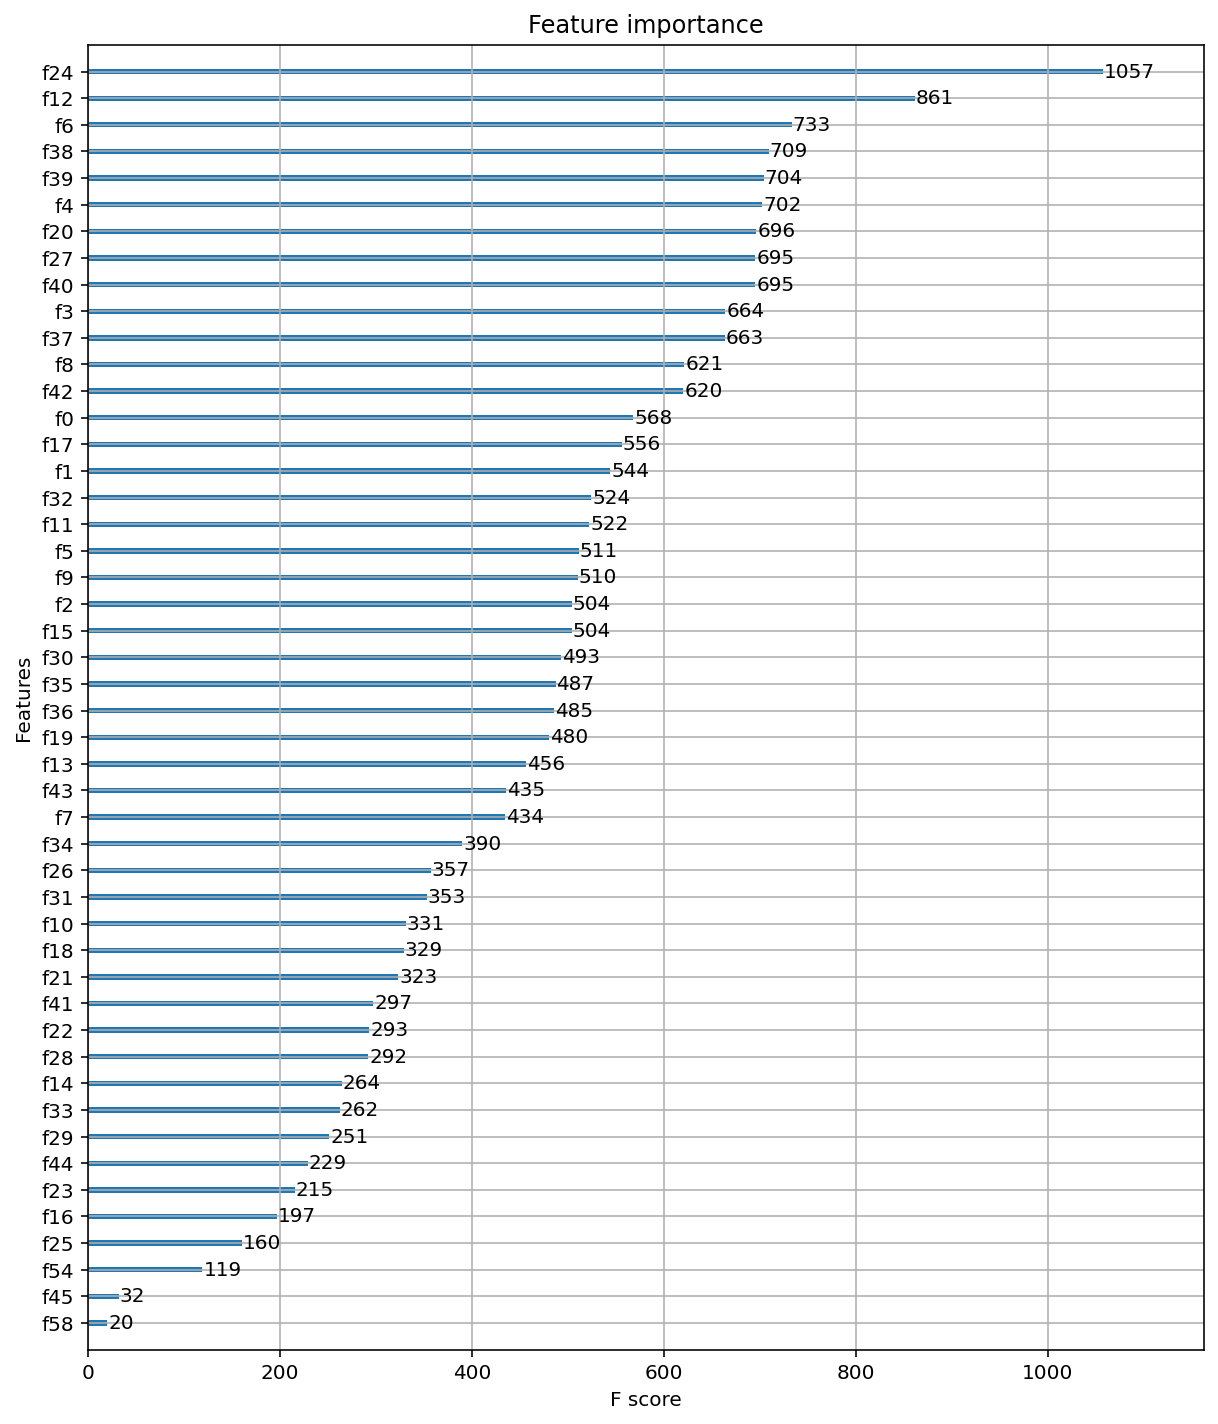

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb0, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


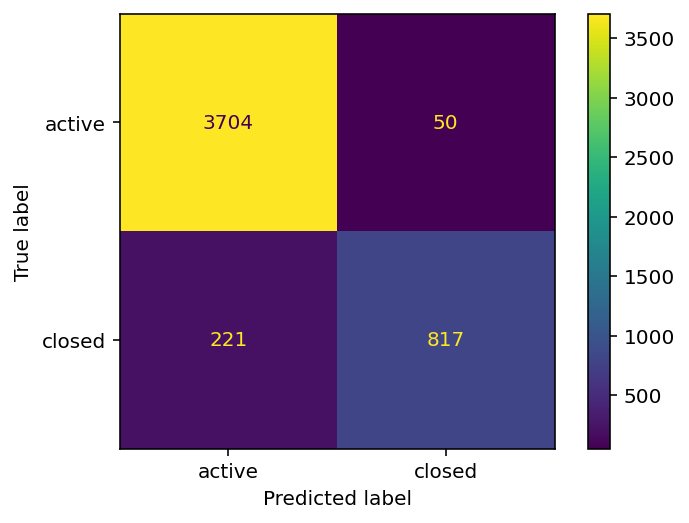

In [ ]:
plot_confusion_matrix(clf_xgb0,
                      test_input0,
                      test_target0,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs0 = clf_xgb0.predict(test_input0)
y_preds0 = [1 if x>0.5 else 0 for x in y_pred_probs0]
print(confusion_matrix(test_target0, y_preds0))
print(classification_report(test_target0, y_preds0))
print(roc_auc_score(test_target0, y_preds0))

[[3704   50]
 [ 221  817]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3754
           1       0.94      0.79      0.86      1038

    accuracy                           0.94      4792
   macro avg       0.94      0.89      0.91      4792
weighted avg       0.94      0.94      0.94      4792

0.8868857162507713


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target0, y_preds0))

from sklearn.metrics import recall_score

print(recall_score(test_target0, y_preds0))

from sklearn.metrics import precision_score

print(precision_score(test_target0, y_preds0))

from sklearn.metrics import f1_score

print(f1_score(test_target0, y_preds0))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target0, y_preds0))

0.9434474123539232
0.7870905587668593
0.9423298731257209
0.8577427821522311
0.8868857162507713


## Model 2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc0 = RandomForestClassifier(random_state=42)
rfc0.fit(train_input0, train_target0)
y_pred0 = rfc0.predict(test_input0)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_target0, y_pred0)))

Model accuracy score with 10 decision-trees : 0.9353


In [ ]:
# 깊이 100으로
rfc0_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc0_100.fit(train_input0, train_target0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
y_pred0_100 = rfc0_100.predict(test_input0)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_target0, y_pred0_100)))

Model accuracy score with 100 decision-trees : 0.9353


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target0, y_pred0_100))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3754
           1       0.95      0.74      0.83      1038

    accuracy                           0.94      4792
   macro avg       0.94      0.86      0.90      4792
weighted avg       0.94      0.94      0.93      4792



In [ ]:
feature_scores0 = pd.Series(rfc0.feature_importances_).sort_values(ascending=False)
feature_scores0[:10]

4     0.136436
5     0.098676
7     0.079380
0     0.079111
2     0.059714
12    0.051669
10    0.047559
11    0.040827
3     0.039582
41    0.039290
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target0, y_pred0_100))

from sklearn.metrics import recall_score

print(recall_score(test_target0, y_pred0_100))

from sklearn.metrics import precision_score

print(precision_score(test_target0, y_pred0_100))

from sklearn.metrics import f1_score

print(f1_score(test_target0, y_pred0_100))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target0, y_pred0_100))

0.9353088480801336
0.7369942196531792
0.9538653366583542
0.8315217391304348
0.8635690331084224


## Model 3. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm0 = LGBMClassifier(n_estimators=400)
evals = [(test_input0, test_target0)]
lgbm0.fit(train_input0, train_target0, early_stopping_rounds=100, eval_metric='logloss',
        eval_set=evals, verbose=True)
preds0 = lgbm0.predict(test_input0)
pred_proba0 = lgbm0.predict_proba(test_input0)[:,1]

[1]	valid_0's binary_logloss: 0.454004	valid_0's binary_logloss: 0.454004
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.407237	valid_0's binary_logloss: 0.407237
[3]	valid_0's binary_logloss: 0.371708	valid_0's binary_logloss: 0.371708
[4]	valid_0's binary_logloss: 0.342951	valid_0's binary_logloss: 0.342951
[5]	valid_0's binary_logloss: 0.318921	valid_0's binary_logloss: 0.318921
[6]	valid_0's binary_logloss: 0.29899	valid_0's binary_logloss: 0.29899
[7]	valid_0's binary_logloss: 0.281344	valid_0's binary_logloss: 0.281344
[8]	valid_0's binary_logloss: 0.266235	valid_0's binary_logloss: 0.266235
[9]	valid_0's binary_logloss: 0.253675	valid_0's binary_logloss: 0.253675
[10]	valid_0's binary_logloss: 0.242649	valid_0's binary_logloss: 0.242649
[11]	valid_0's binary_logloss: 0.232917	valid_0's binary_logloss: 0.232917
[12]	valid_0's binary_logloss: 0.224176	valid_0's binary_logloss: 0.224176
[13]	valid_0's binary_logloss: 0.216525	valid_0'

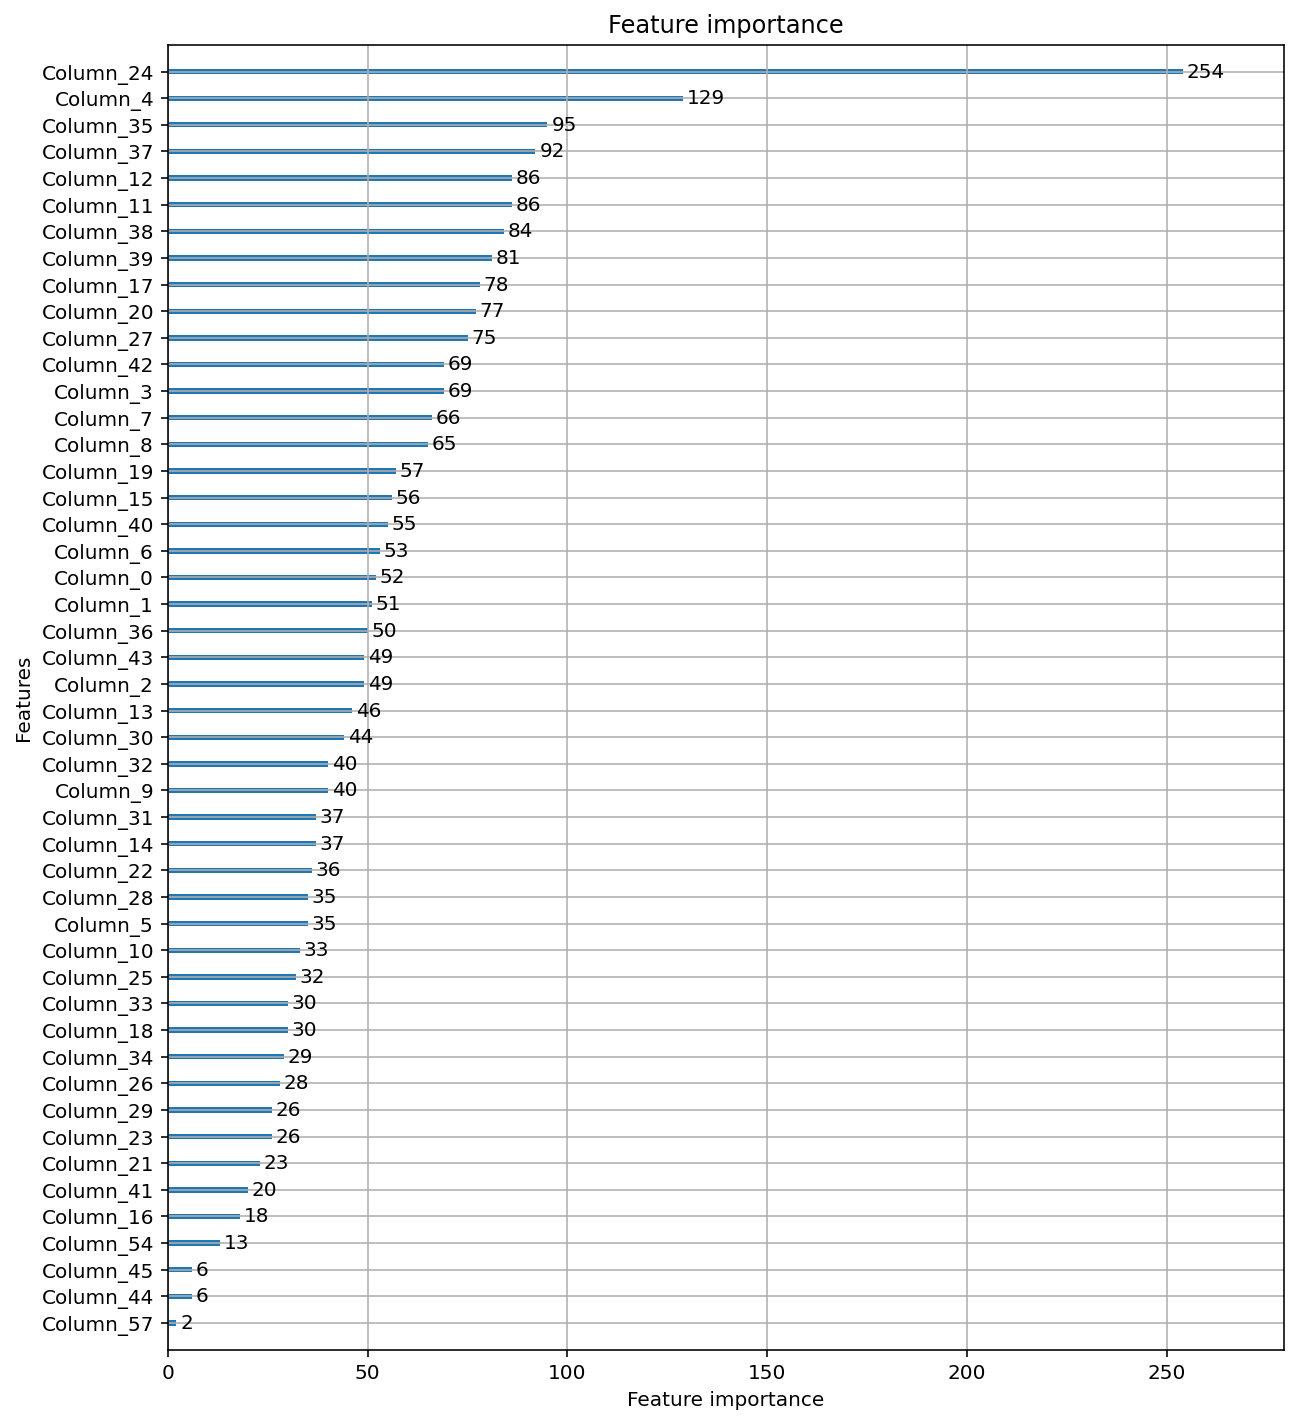

In [ ]:
#feature importance graph
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm0, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


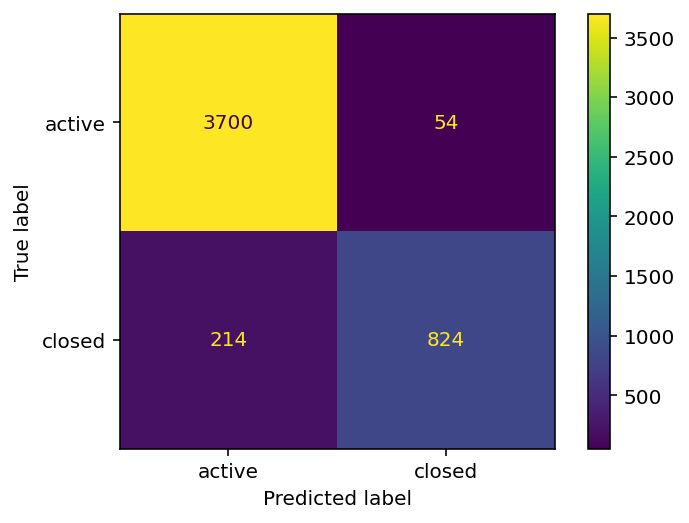

In [ ]:
plot_confusion_matrix(lgbm0,
                      test_input0,
                      test_target0,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs_lgbm0 = lgbm0.predict(test_input0)
y_preds_lgbm0 = [1 if x>0.5 else 0 for x in y_pred_probs_lgbm0]
print(confusion_matrix(test_target0, y_preds_lgbm0))
print(classification_report(test_target0, y_preds_lgbm0))
print(roc_auc_score(test_target0, y_preds_lgbm0))

[[3700   54]
 [ 214  824]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3754
           1       0.94      0.79      0.86      1038

    accuracy                           0.94      4792
   macro avg       0.94      0.89      0.91      4792
weighted avg       0.94      0.94      0.94      4792

0.8897248201789638


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target0, y_preds_lgbm0))

from sklearn.metrics import recall_score

print(recall_score(test_target0, y_preds_lgbm0))

from sklearn.metrics import precision_score

print(precision_score(test_target0, y_preds_lgbm0))

from sklearn.metrics import f1_score

print(f1_score(test_target0, y_preds_lgbm0))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target0, y_preds_lgbm0))

0.9440734557595993
0.7938342967244701
0.9384965831435079
0.8601252609603339
0.8897248201789638


# 2차 모델링

In [ ]:
total_data.fillna(0, inplace=True)

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             24020 non-null  float64
 1   매출채권             24020 non-null  float64
 2   비유동자산            24020 non-null  float64
 3   유형자산             24020 non-null  float64
 4   자산총계             24020 non-null  float64
 5   유동부채             24020 non-null  float64
 6   비유동부채            24020 non-null  float64
 7   부채총계             24020 non-null  float64
 8   자본금              24020 non-null  float64
 9   이익잉여금(결손금)       24020 non-null  float64
 10  자본총계             24020 non-null  float64
 11  매출액              24020 non-null  float64
 12  판매비와관리비          24020 non-null  float64
 13  영업이익(손실)         24020 non-null  float64
 14  법인세비용차감전순손익      24020 non-null  float64
 15  법인세비용            24020 non-null  float64
 16  당기순이익(손실)        24020 non-null  float64
 17  기업순이익률      

In [ ]:
total_data.iloc[:,:44]

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,이익잉여금(결손금),...,비유동부채비율(%),부채총계대매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
0,14692119.25,3047592.25,1382678.25,314141.50,16074797.50,8163105.25,2439803.75,10602909.00,1803040.0,3276322.75,...,4.458750e+01,6.831925e+01,9.830000e-01,1.421000e+00,4.972250e+00,6.662750e+00,1.221667e+03,14850953.00,0.00,11250222.25
1,26020995.25,7847455.75,5272891.00,3112750.00,31293886.25,9877038.75,0.00,9877038.75,200000.0,21216847.25,...,1.000000e+12,2.046925e+01,1.538750e+00,6.042000e+00,6.029500e+00,2.439925e+01,3.187528e+06,45280343.75,0.00,7847786.75
2,18783464.50,2005464.25,10001694.50,8587823.25,28785159.00,9728337.00,255527.75,9983864.75,350000.0,18451294.25,...,1.455000e+00,3.147350e+01,1.135500e+00,3.258750e+00,1.757450e+01,5.501550e+01,0.000000e+00,22694333.50,842202.00,10103633.25
3,6667116.25,213658.25,7429257.75,6262690.75,14096374.00,4279989.00,1809475.50,6089464.75,2297000.0,1848037.25,...,2.340425e+01,5.919900e+01,7.600000e-01,1.989750e+00,4.694800e+01,4.448375e+01,7.953000e+03,3642789.75,30671.50,5270223.25
4,29735694.25,300916.50,20502550.00,16157779.00,50238244.25,19171676.50,8892628.00,28064304.50,300000.0,24335815.75,...,4.314125e+01,9.469525e+01,6.620000e-01,1.509000e+00,1.177040e+02,8.403250e+00,6.338333e+04,22951076.00,12186.75,21925238.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,30019654.50,0.00,200000.00,0.00,30119654.50,18918114.00,25781781.00,31809004.50,150000.0,-1839350.00,...,1.000000e+12,8.547696e+05,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,7.413900e+04,11174321.00,0.00,19995725.00
24016,42486094.75,0.00,26143750.50,0.00,68629845.25,1956039.75,36004.00,1983042.50,1000000.0,17730147.00,...,2.500000e+11,9.166668e+11,2.500000e+11,1.000000e+12,1.000000e+12,1.000000e+12,1.602647e+07,0.00,0.00,0.00
24017,2561005.00,15745.00,40338469.00,9529.00,42899475.00,741810.00,36503080.00,37244889.00,10000000.0,-4244615.00,...,1.000000e+12,3.880210e+02,1.000000e+12,1.000000e+12,1.000000e+12,1.000000e+12,0.000000e+00,10511178.00,40328940.00,0.00
24018,15705260.50,596657.00,62500.00,0.00,15767760.50,4809974.00,11010083.50,15820057.50,100000.0,-152297.00,...,5.000000e+11,4.444445e+11,5.000000e+11,5.000000e+11,1.000000e+12,1.000000e+12,3.735700e+04,5351082.00,0.00,12836559.00


In [ ]:
total_data.iloc[:,44:47]

,산업코드,산업코드_eng,폐업여부
0,46,G,0
1,46,G,0
2,46,G,0
3,46,G,0
4,47,G,0
...,...,...,...
24015,41,F,0
24016,41,F,0
24017,41,F,0
24018,41,F,0


In [ ]:
total_data.iloc[:,47:60]

,고용허가제 외국인근로자 도입,산재신청 승인율,요양급여,휴업급여,상병보상연금,장해급여,유족급여,장의비,간병급여,재활급여,코스닥_회사수,코스닥_상장주식수,코스닥_시가총액
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
1,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
4,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24015,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
24016,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
24017,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0
24018,207.0,95.0,3.836780e+11,4.719870e+11,4.254000e+10,7.427800e+11,2.069860e+11,9.814405e+09,1.793446e+10,7.349725e+09,25.0,902812.0,3266251.0


In [ ]:
from sklearn.model_selection import train_test_split

x1 = pd.concat([total_data.iloc[:,:44],total_data.iloc[:,47:]], axis=1)
X1 = x1.to_numpy()
target1 = total_data['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             24020 non-null  float64
 1   매출채권             24020 non-null  float64
 2   비유동자산            24020 non-null  float64
 3   유형자산             24020 non-null  float64
 4   자산총계             24020 non-null  float64
 5   유동부채             24020 non-null  float64
 6   비유동부채            24020 non-null  float64
 7   부채총계             24020 non-null  float64
 8   자본금              24020 non-null  float64
 9   이익잉여금(결손금)       24020 non-null  float64
 10  자본총계             24020 non-null  float64
 11  매출액              24020 non-null  float64
 12  판매비와관리비          24020 non-null  float64
 13  영업이익(손실)         24020 non-null  float64
 14  법인세비용차감전순손익      24020 non-null  float64
 15  법인세비용            24020 non-null  float64
 16  당기순이익(손실)        24020 non-null  float64
 17  기업순이익률      

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit1 = scaler.fit(X1)
X_scaled1 = scaler_fit1.transform(X1)

In [ ]:
train_input1, test_input1, train_target1, test_target1 = train_test_split(X_scaled1, target1, test_size=0.2, random_state=42)

In [ ]:
train_input1

array([[7.96900119e-04, 5.17435766e-04, 1.89892923e-03, ...,
        2.39117106e-03, 1.00000000e+00, 1.00000000e+00],
       [2.82995387e-03, 2.38527918e-03, 4.46049487e-03, ...,
        4.29184549e-03, 3.03590206e-01, 3.33333333e-01],
       [3.51443684e-03, 2.06701238e-03, 2.14428826e-03, ...,
        5.08890251e-03, 3.03590206e-01, 3.33333333e-01],
       ...,
       [1.97705687e-03, 2.16970176e-06, 2.15767510e-03, ...,
        3.67872471e-04, 1.00000000e+00, 1.00000000e+00],
       [6.94063765e-04, 7.32123654e-04, 1.81027949e-03, ...,
        1.22624157e-03, 3.03590206e-01, 3.33333333e-01],
       [3.02633622e-03, 2.16766655e-05, 3.62788633e-06, ...,
        3.67872471e-04, 8.35211056e-02, 1.66666667e-01]])

In [ ]:
test_input1

array([[6.29119537e-04, 1.23397574e-04, 3.52671133e-03, ...,
        4.53709381e-03, 1.00000000e+00, 1.00000000e+00],
       [1.34458590e-04, 0.00000000e+00, 3.01086559e-05, ...,
        3.67872471e-04, 1.00000000e+00, 1.00000000e+00],
       [2.29663339e-05, 3.27313856e-05, 2.09003706e-06, ...,
        0.00000000e+00, 3.03590206e-01, 3.33333333e-01],
       ...,
       [4.51940071e-03, 1.19013389e-03, 8.87390037e-03, ...,
        1.04230533e-02, 3.03590206e-01, 3.33333333e-01],
       [8.29425794e-04, 3.24229024e-04, 5.50786887e-03, ...,
        1.77805028e-03, 3.03590206e-01, 3.33333333e-01],
       [2.90471835e-03, 8.90953757e-04, 1.10293691e-03, ...,
        3.18822808e-03, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report, roc_auc_score

## Model 1. XGBoost

In [ ]:
#XGboost 모델 구축하기
clf_xgb1 = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30, missing=None)
clf_xgb1.fit(train_input1,
            train_target1,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input1, test_target1)])

[0]	validation_0-aucpr:0.938117
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.941322
[2]	validation_0-aucpr:0.943976
[3]	validation_0-aucpr:0.944525
[4]	validation_0-aucpr:0.948253
[5]	validation_0-aucpr:0.948772
[6]	validation_0-aucpr:0.949067
[7]	validation_0-aucpr:0.949737
[8]	validation_0-aucpr:0.950245
[9]	validation_0-aucpr:0.950796
[10]	validation_0-aucpr:0.95119
[11]	validation_0-aucpr:0.951887
[12]	validation_0-aucpr:0.952422
[13]	validation_0-aucpr:0.952614
[14]	validation_0-aucpr:0.953502
[15]	validation_0-aucpr:0.954015
[16]	validation_0-aucpr:0.954616
[17]	validation_0-aucpr:0.955242
[18]	validation_0-aucpr:0.95602
[19]	validation_0-aucpr:0.956231
[20]	validation_0-aucpr:0.956623
[21]	validation_0-aucpr:0.957272
[22]	validation_0-aucpr:0.957605
[23]	validation_0-aucpr:0.957755
[24]	validation_0-aucpr:0.958109
[25]	validation_0-aucpr:0.958232
[26]	validation_0-aucpr:0.958507
[27]	validation_0-aucpr:0.958715
[28]	validation_0-aucp

XGBClassifier(max_depth=30)

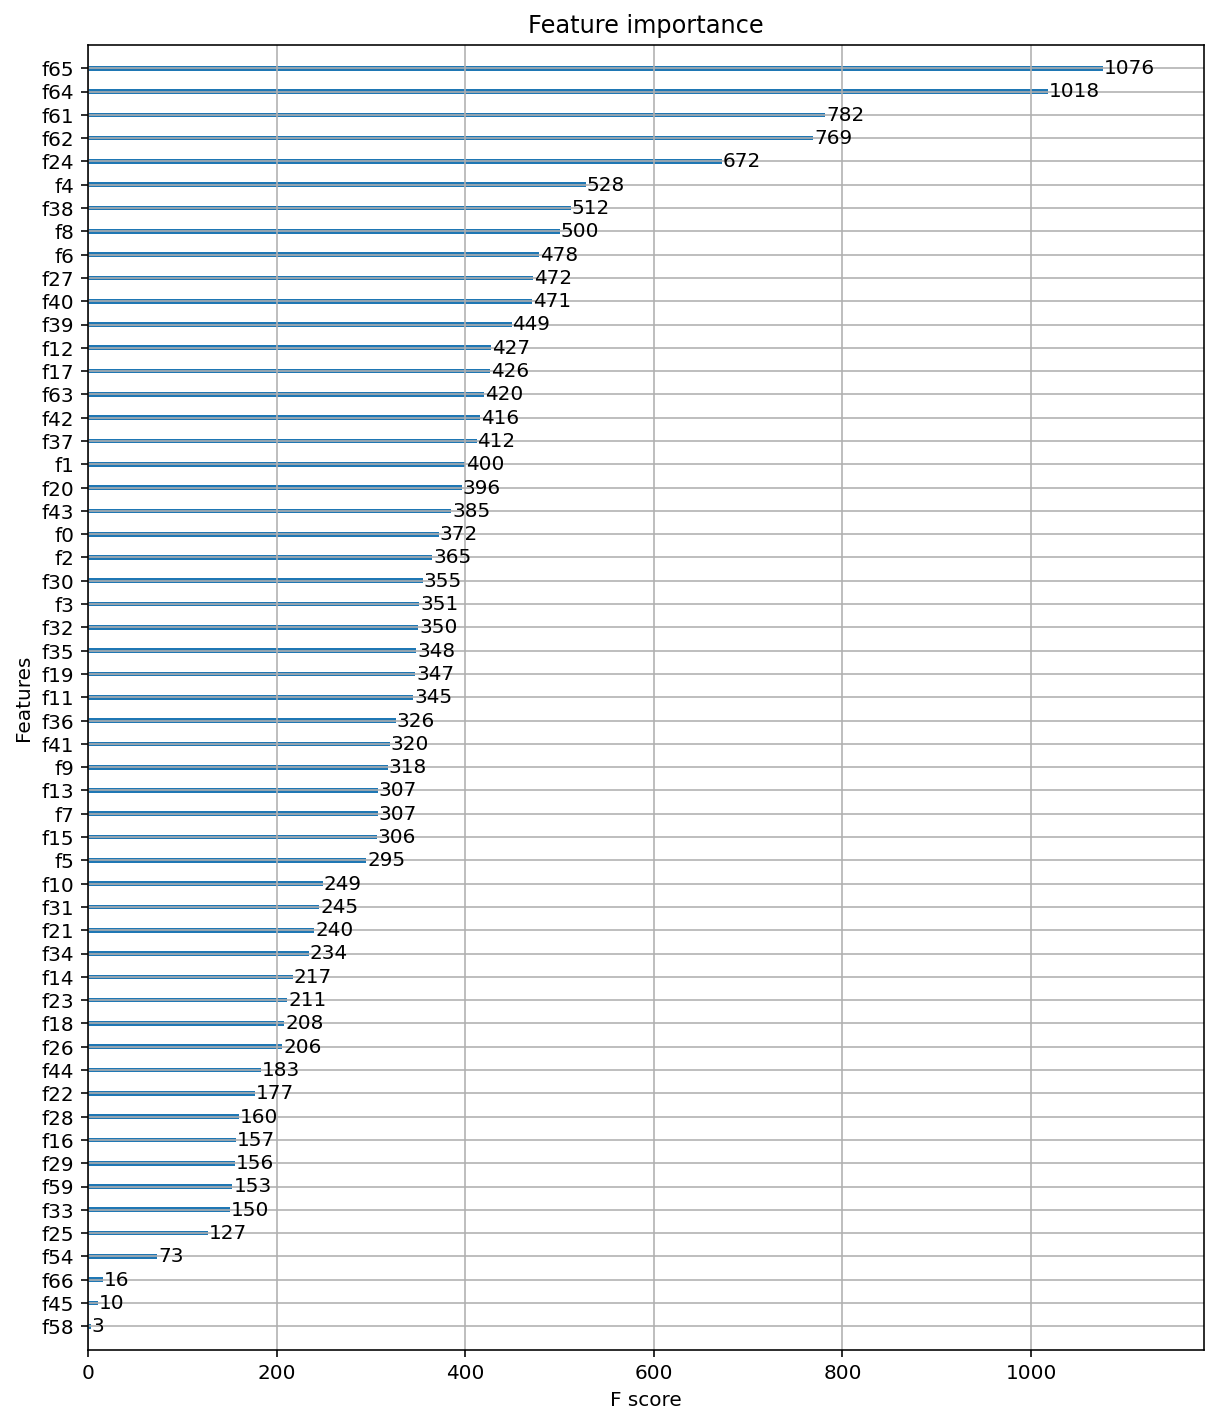

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb1, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


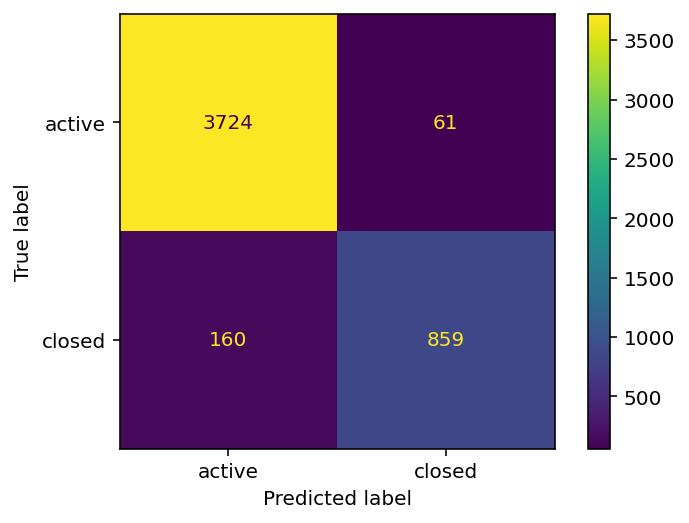

In [ ]:
plot_confusion_matrix(clf_xgb1,
                      test_input1,
                      test_target1,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs_xgb1 = clf_xgb1.predict(test_input1)
y_preds_xgb1 = [1 if x>0.5 else 0 for x in y_pred_probs_xgb1]
print(confusion_matrix(test_target1, y_preds_xgb1))
print(classification_report(test_target1, y_preds_xgb1))
print(roc_auc_score(test_target1, y_preds_xgb1))

[[3724   61]
 [ 160  859]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3785
           1       0.93      0.84      0.89      1019

    accuracy                           0.95      4804
   macro avg       0.95      0.91      0.93      4804
weighted avg       0.95      0.95      0.95      4804

0.913433534314342


## Model 2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(random_state=42)
rfc1.fit(train_input1, train_target1)
y_pred1 = rfc1.predict(test_input1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_target1, y_pred1)))

Model accuracy score with 10 decision-trees : 0.9523


In [ ]:
# 깊이 100으로
rfc1_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc1_100.fit(train_input1, train_target1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
y_pred1_100 = rfc1_100.predict(test_input1)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_target1, y_pred1_100)))

Model accuracy score with 100 decision-trees : 0.9523


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target1, y_pred1_100))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3785
           1       0.95      0.82      0.88      1019

    accuracy                           0.95      4804
   macro avg       0.95      0.90      0.92      4804
weighted avg       0.95      0.95      0.95      4804



In [ ]:
feature_scores1 = pd.Series(rfc1.feature_importances_).sort_values(ascending=False)
feature_scores1[:10]

4     0.104122
7     0.095659
0     0.092407
5     0.080849
62    0.076279
61    0.055856
12    0.041460
2     0.035239
11    0.033318
10    0.031858
dtype: float64

## Model 3. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm1 = LGBMClassifier(n_estimators=400)
evals = [(test_input1, test_target1)]
lgbm1.fit(train_input1, train_target1, early_stopping_rounds=100, eval_metric='logloss',
        eval_set=evals, verbose=True)
preds1 = lgbm1.predict(test_input1)
pred_proba1 = lgbm1.predict_proba(test_input1)[:,1]

[1]	valid_0's binary_logloss: 0.446506	valid_0's binary_logloss: 0.446506
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.398471	valid_0's binary_logloss: 0.398471
[3]	valid_0's binary_logloss: 0.360867	valid_0's binary_logloss: 0.360867
[4]	valid_0's binary_logloss: 0.331066	valid_0's binary_logloss: 0.331066
[5]	valid_0's binary_logloss: 0.306318	valid_0's binary_logloss: 0.306318
[6]	valid_0's binary_logloss: 0.284952	valid_0's binary_logloss: 0.284952
[7]	valid_0's binary_logloss: 0.266908	valid_0's binary_logloss: 0.266908
[8]	valid_0's binary_logloss: 0.251198	valid_0's binary_logloss: 0.251198
[9]	valid_0's binary_logloss: 0.236643	valid_0's binary_logloss: 0.236643
[10]	valid_0's binary_logloss: 0.224308	valid_0's binary_logloss: 0.224308
[11]	valid_0's binary_logloss: 0.213215	valid_0's binary_logloss: 0.213215
[12]	valid_0's binary_logloss: 0.203349	valid_0's binary_logloss: 0.203349
[13]	valid_0's binary_logloss: 0.194474	valid_

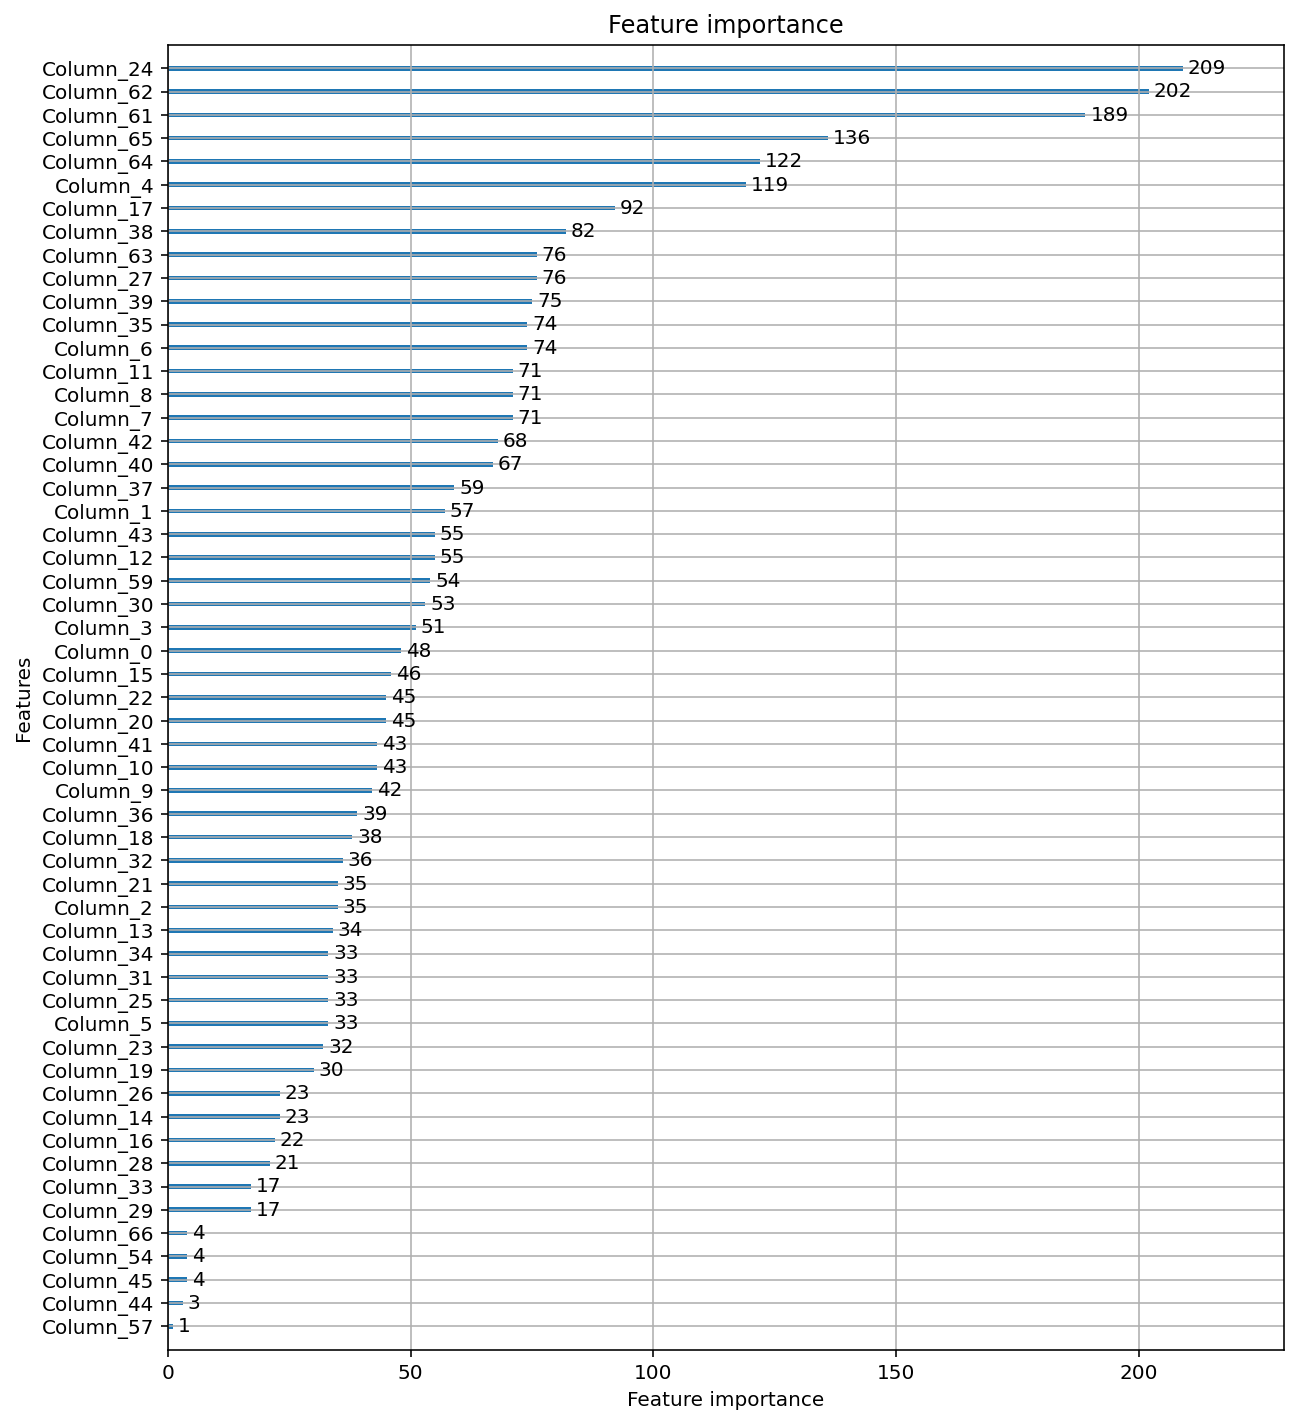

In [ ]:
#feature importance graph
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm1, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


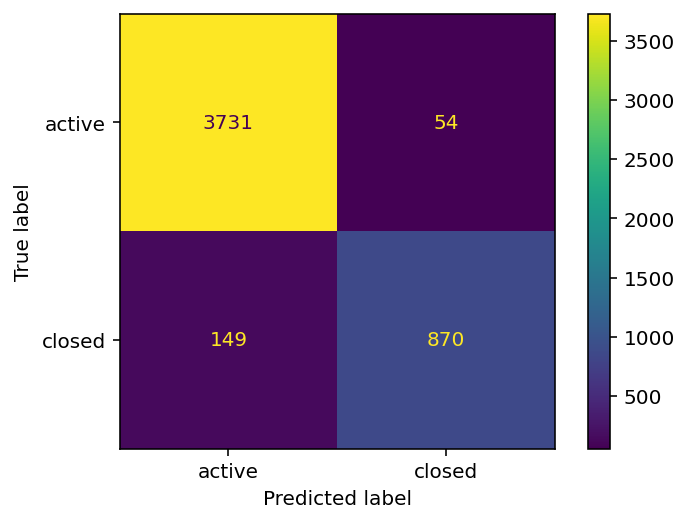

In [ ]:
plot_confusion_matrix(lgbm1,
                      test_input1,
                      test_target1,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs_lgbm1 = lgbm1.predict(test_input1)
y_preds_lgbm1 = [1 if x>0.5 else 0 for x in y_pred_probs_lgbm1]
print(confusion_matrix(test_target1, y_preds_lgbm1))
print(classification_report(test_target1, y_preds_lgbm1))
print(roc_auc_score(test_target1, y_preds_lgbm1))

[[3731   54]
 [ 149  870]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3785
           1       0.94      0.85      0.90      1019

    accuracy                           0.96      4804
   macro avg       0.95      0.92      0.93      4804
weighted avg       0.96      0.96      0.96      4804

0.9197556855673511


# 3차 모델링

- 산업재해 '규모별 동종 업종 평균 재해율' 포함해서 이전과 비교

In [ ]:
total_data_plus.fillna(0, inplace=True)

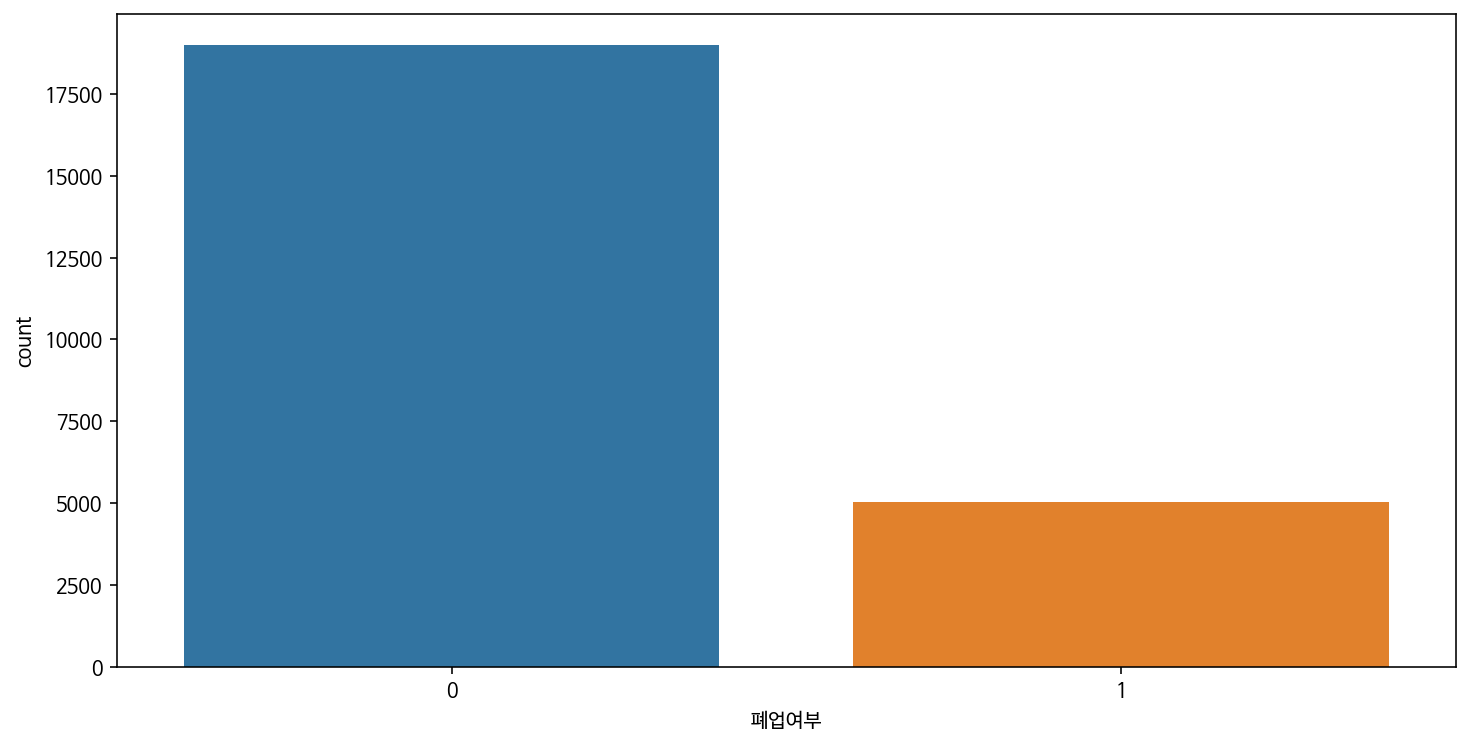

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='폐업여부', data=total_data_plus)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x2 = pd.concat([total_data_plus.iloc[:,:44],total_data_plus.iloc[:,47:]], axis=1)
X2 = x2.to_numpy()
target2 = total_data_plus['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24020 entries, 5961 to 20916
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             24020 non-null  float64
 1   매출채권             24020 non-null  float64
 2   비유동자산            24020 non-null  float64
 3   유형자산             24020 non-null  float64
 4   자산총계             24020 non-null  float64
 5   유동부채             24020 non-null  float64
 6   비유동부채            24020 non-null  float64
 7   부채총계             24020 non-null  float64
 8   자본금              24020 non-null  float64
 9   이익잉여금(결손금)       24020 non-null  float64
 10  자본총계             24020 non-null  float64
 11  매출액              24020 non-null  float64
 12  판매비와관리비          24020 non-null  float64
 13  영업이익(손실)         24020 non-null  float64
 14  법인세비용차감전순손익      24020 non-null  float64
 15  법인세비용            24020 non-null  float64
 16  당기순이익(손실)        24020 non-null  float64
 17  기업순이익률   

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit2 = scaler.fit(X2)
X_scaled2 = scaler_fit2.transform(X2)

In [ ]:
train_input2, test_input2, train_target2, test_target2 = train_test_split(X_scaled2, target2, test_size=0.2, random_state=42)

## Model 1. XGBoost

In [ ]:
#XGboost 모델 구축하기
clf_xgb2 = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30, missing=None)
clf_xgb2.fit(train_input2,
            train_target2,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input2, test_target2)])

[0]	validation_0-aucpr:0.93965
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.940465
[2]	validation_0-aucpr:0.943605
[3]	validation_0-aucpr:0.944809
[4]	validation_0-aucpr:0.948372
[5]	validation_0-aucpr:0.948646
[6]	validation_0-aucpr:0.949002
[7]	validation_0-aucpr:0.948895
[8]	validation_0-aucpr:0.953592
[9]	validation_0-aucpr:0.954475
[10]	validation_0-aucpr:0.955278
[11]	validation_0-aucpr:0.956628
[12]	validation_0-aucpr:0.957304
[13]	validation_0-aucpr:0.958471
[14]	validation_0-aucpr:0.959343
[15]	validation_0-aucpr:0.960669
[16]	validation_0-aucpr:0.961182
[17]	validation_0-aucpr:0.961383
[18]	validation_0-aucpr:0.961606
[19]	validation_0-aucpr:0.961987
[20]	validation_0-aucpr:0.962251
[21]	validation_0-aucpr:0.962454
[22]	validation_0-aucpr:0.962527
[23]	validation_0-aucpr:0.962802
[24]	validation_0-aucpr:0.962835
[25]	validation_0-aucpr:0.96278
[26]	validation_0-aucpr:0.962927
[27]	validation_0-aucpr:0.963139
[28]	validation_0-aucp

XGBClassifier(max_depth=30)

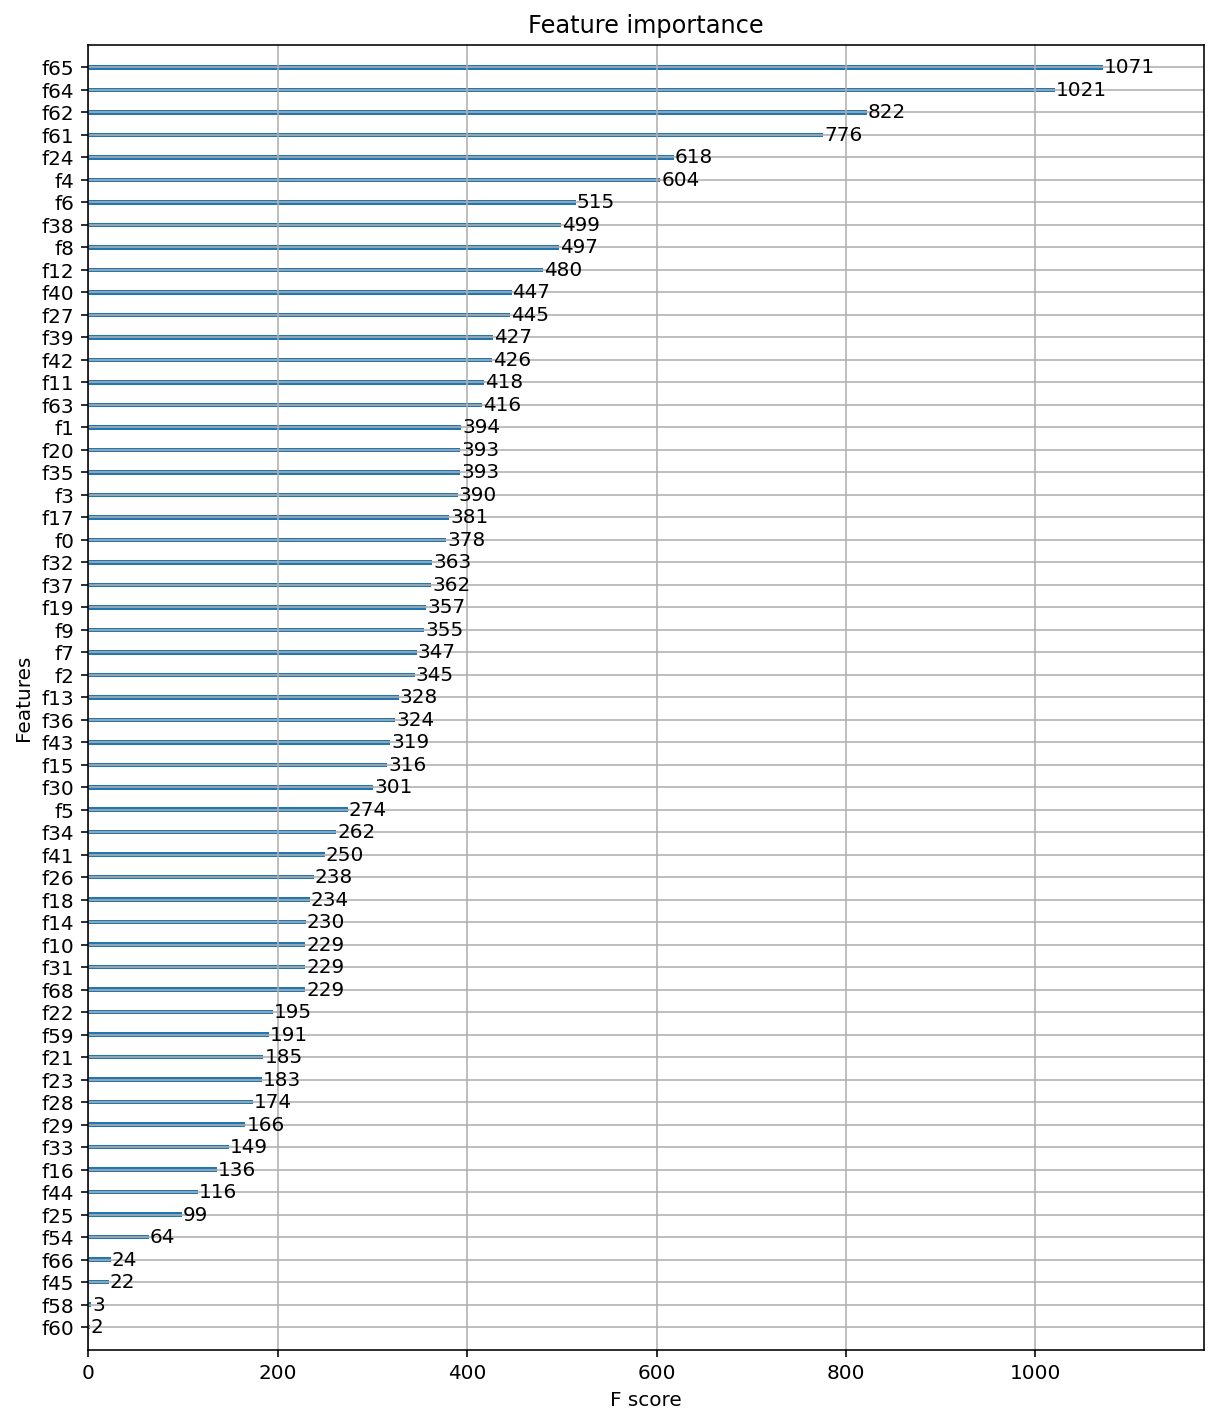

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb2, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


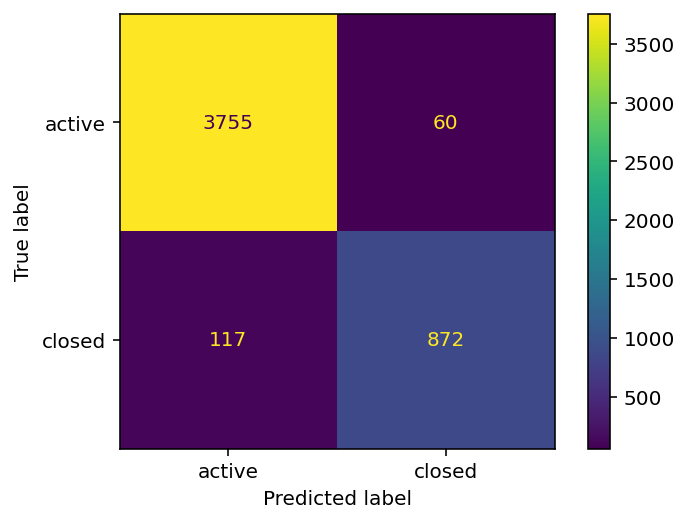

In [ ]:
plot_confusion_matrix(clf_xgb2,
                      test_input2,
                      test_target2,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs2 = clf_xgb2.predict(test_input2)
y_preds2 = [1 if x>0.5 else 0 for x in y_pred_probs2]
print(confusion_matrix(test_target2, y_preds2))
print(classification_report(test_target2, y_preds2))
print(roc_auc_score(test_target2, y_preds2))

[[3755   60]
 [ 117  872]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3815
           1       0.94      0.88      0.91       989

    accuracy                           0.96      4804
   macro avg       0.95      0.93      0.94      4804
weighted avg       0.96      0.96      0.96      4804

0.9329856468333847


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target2, y_preds2))

from sklearn.metrics import recall_score

print(recall_score(test_target2, y_preds2))

from sklearn.metrics import precision_score

print(precision_score(test_target2, y_preds2))

from sklearn.metrics import f1_score

print(f1_score(test_target2, y_preds2))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target2, y_preds2))

0.9631557035803497
0.8816986855409504
0.9356223175965666
0.9078604893284747
0.9329856468333847


## Model 2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(train_input2, train_target2)
y_pred2 = rfc2.predict(test_input2)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_target2, y_pred2)))

Model accuracy score with 10 decision-trees : 0.9600


In [ ]:
# 깊이 100으로
rfc2_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc2_100.fit(train_input2, train_target2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
y_pred2_100 = rfc2_100.predict(test_input2)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_target2, y_pred2_100)))

Model accuracy score with 100 decision-trees : 0.9600


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target2, y_pred2_100))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3815
           1       0.96      0.85      0.90       989

    accuracy                           0.96      4804
   macro avg       0.96      0.92      0.94      4804
weighted avg       0.96      0.96      0.96      4804



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


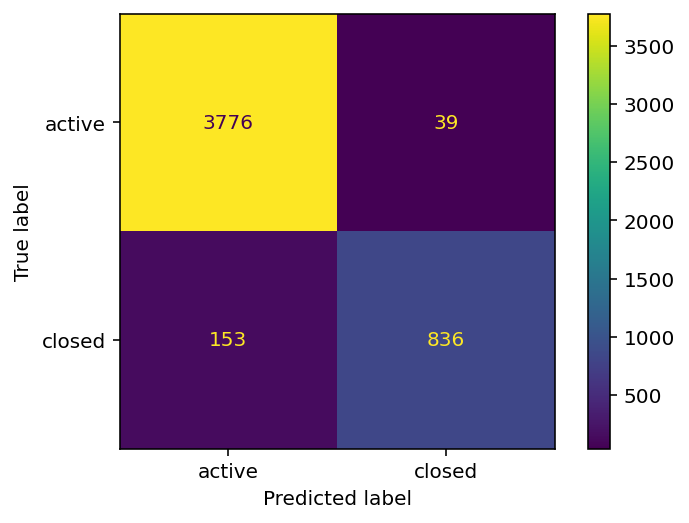

In [ ]:
plot_confusion_matrix(rfc2,
                      test_input2,
                      test_target2,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
feature_scores2 = pd.Series(rfc2.feature_importances_).sort_values(ascending=False)
feature_scores2[:10]

4     0.111696
7     0.086463
0     0.079333
61    0.078334
5     0.070174
62    0.063508
11    0.038516
2     0.038508
12    0.033757
10    0.029581
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target2, y_pred2_100))

from sklearn.metrics import recall_score

print(recall_score(test_target2, y_pred2_100))

from sklearn.metrics import precision_score

print(precision_score(test_target2, y_pred2_100))

from sklearn.metrics import f1_score

print(f1_score(test_target2, y_pred2_100))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target2, y_pred2_100))

0.9600333055786844
0.8452982810920121
0.9554285714285714
0.8969957081545065
0.9175377381868972


## Model 3. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm2 = LGBMClassifier(n_estimators=400)
evals = [(test_input2, test_target2)]
lgbm2.fit(train_input2, train_target2, early_stopping_rounds=100, eval_metric='logloss',
        eval_set=evals, verbose=True)
preds2 = lgbm2.predict(test_input2)
pred_proba2 = lgbm2.predict_proba(test_input2)[:,1]

[1]	valid_0's binary_logloss: 0.436274	valid_0's binary_logloss: 0.436274
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.387153	valid_0's binary_logloss: 0.387153
[3]	valid_0's binary_logloss: 0.34982	valid_0's binary_logloss: 0.34982
[4]	valid_0's binary_logloss: 0.319386	valid_0's binary_logloss: 0.319386
[5]	valid_0's binary_logloss: 0.293859	valid_0's binary_logloss: 0.293859
[6]	valid_0's binary_logloss: 0.27277	valid_0's binary_logloss: 0.27277
[7]	valid_0's binary_logloss: 0.254851	valid_0's binary_logloss: 0.254851
[8]	valid_0's binary_logloss: 0.239092	valid_0's binary_logloss: 0.239092
[9]	valid_0's binary_logloss: 0.224986	valid_0's binary_logloss: 0.224986
[10]	valid_0's binary_logloss: 0.212597	valid_0's binary_logloss: 0.212597
[11]	valid_0's binary_logloss: 0.201561	valid_0's binary_logloss: 0.201561
[12]	valid_0's binary_logloss: 0.19108	valid_0's binary_logloss: 0.19108
[13]	valid_0's binary_logloss: 0.182	valid_0's binar

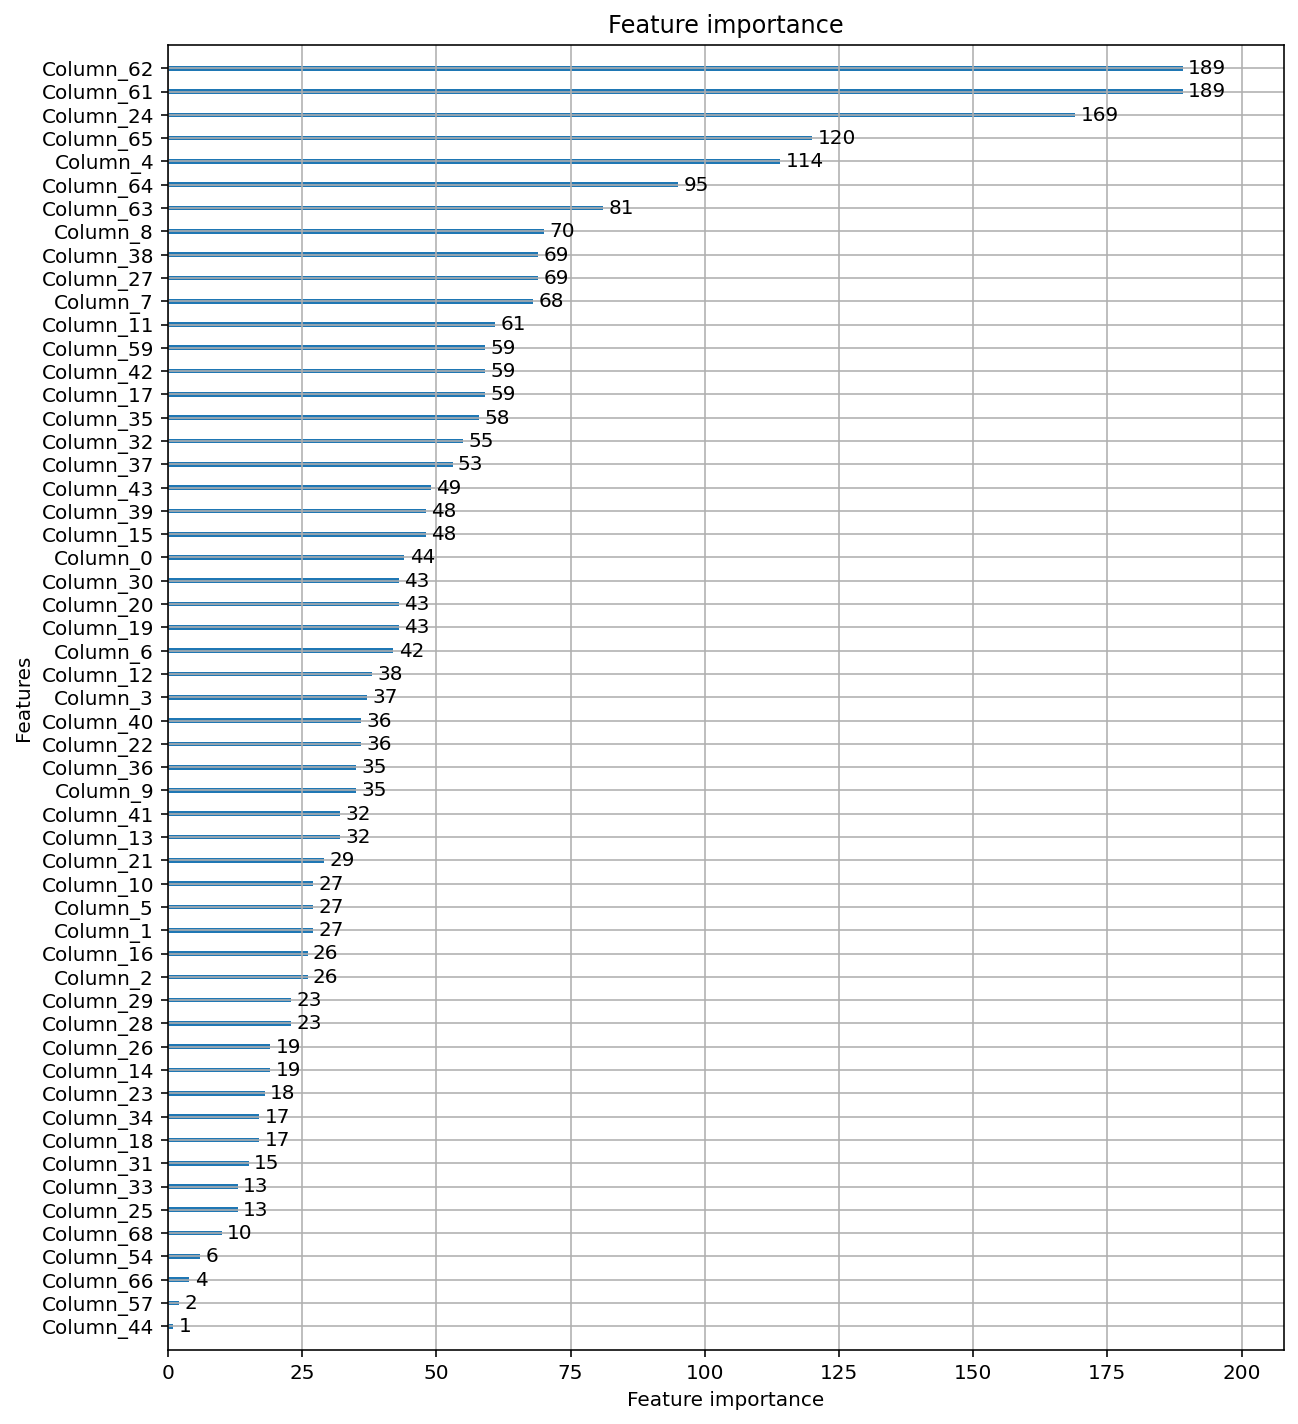

In [ ]:
#feature importance graph
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm2, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


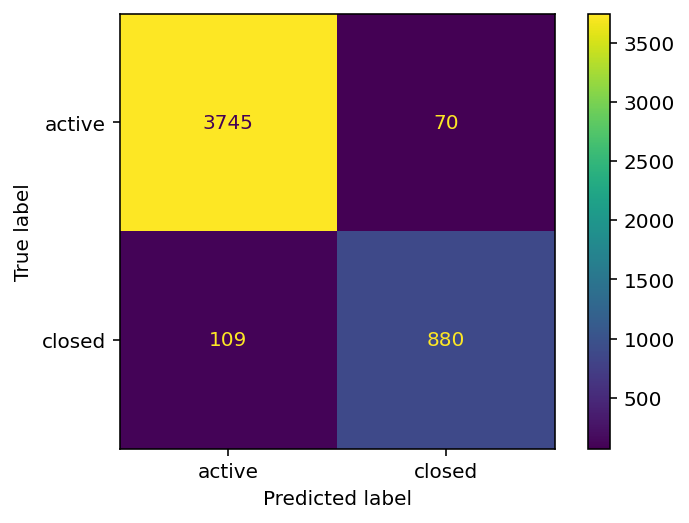

In [ ]:
plot_confusion_matrix(lgbm2,
                      test_input2,
                      test_target2,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs_lgbm2 = lgbm2.predict(test_input2)
y_preds_lgbm2 = [1 if x>0.5 else 0 for x in y_pred_probs_lgbm2]
print(confusion_matrix(test_target2, y_preds_lgbm2))
print(classification_report(test_target2, y_preds_lgbm2))
print(roc_auc_score(test_target2, y_preds_lgbm2))

[[3745   70]
 [ 109  880]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3815
           1       0.93      0.89      0.91       989

    accuracy                           0.96      4804
   macro avg       0.95      0.94      0.94      4804
weighted avg       0.96      0.96      0.96      4804

0.935719520227085


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target2, y_preds_lgbm2))

from sklearn.metrics import recall_score

print(recall_score(test_target2, y_preds_lgbm2))

from sklearn.metrics import precision_score

print(precision_score(test_target2, y_preds_lgbm2))

from sklearn.metrics import f1_score

print(f1_score(test_target2, y_preds_lgbm2))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target2, y_preds_lgbm2))

0.9627393838467944
0.8897876643073812
0.9263157894736842
0.9076843733883445
0.935719520227085


# 4차 모델링 - 폐업여부 조정

In [ ]:
total_data_plus['폐업여부'].value_counts()

0    18983
1     5037
Name: 폐업여부, dtype: int64

In [ ]:
data_1 = total_data_plus[total_data_plus["폐업여부"] == 1]
data_0 = total_data_plus[total_data_plus["폐업여부"] == 0]

In [ ]:
data_0_revised = data_0.sample(n=data_1.shape[0], random_state=45)
data_0_revised

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,이익잉여금(결손금),...,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도,accident
2350,2.797678e+07,4241745.00,1.375694e+08,72074328.00,1.655462e+08,41970596.00,68025707.00,1.099963e+08,6333520.0,36543968.00,...,1,1,0.2353,0.2727,15,0.0,5.0,66.57,0.51,0.6200
1032,1.208049e+07,598778.75,6.003906e+07,34489762.25,7.211955e+07,6312083.75,11118924.25,1.743101e+07,1100000.0,53815301.25,...,1,1,0.2353,0.2727,15,14477.0,90.0,66.57,0.51,0.0000
17764,1.090062e+07,1696000.25,7.343632e+07,18058687.50,8.433695e+07,31154102.75,14447474.75,4.560158e+07,500000.0,33496661.00,...,1,1,0.0156,0.5625,20,7607.0,60.0,20.21,0.43,0.7825
4305,1.102316e+07,3689039.00,2.052670e+06,1139889.50,1.307583e+07,5797622.50,2679997.00,8.477620e+06,400000.0,4198209.25,...,1,1,0.1429,0.0714,15,7351.0,15.0,66.57,0.51,0.6200
9801,1.079150e+06,751413.75,1.204943e+07,11647591.00,1.312858e+07,6885636.75,4073650.25,1.095929e+07,1300000.0,869291.25,...,1,1,0.4286,0.5536,24,8863.0,61.0,20.21,0.43,0.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1.099967e+07,1328395.00,8.334687e+06,6871487.00,1.933436e+07,11195434.00,3029085.75,1.422452e+07,225000.0,3050404.75,...,2,1,0.0000,0.0000,15,8912.0,12.0,66.57,0.51,0.6200
20972,1.165750e+08,17946575.25,3.234506e+07,17107377.75,1.489200e+08,39516499.00,19182698.25,5.869920e+07,600000.0,91882449.50,...,2,1,1.0000,1.0000,10,3896.0,29.0,5.56,0.41,1.8200
14780,2.886881e+06,1190218.00,1.196341e+07,11059646.00,1.485029e+07,4493385.25,5329323.25,9.822708e+06,317260.0,4475222.25,...,2,1,0.3718,0.3205,15,5025.0,75.0,20.21,0.43,0.7825
3002,2.433954e+07,4750847.50,1.269752e+07,9370335.50,3.703706e+07,9812565.50,110000.00,9.922566e+06,103950.0,16490663.50,...,1,1,0.6875,0.9688,19,5720.0,284.0,66.57,0.51,0.0000


In [ ]:
handled_data = pd.concat([data_0_revised, data_1], ignore_index=True)
handled_data

,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부채총계,자본금,이익잉여금(결손금),...,payroll,new_payroll,employment,resignation,cmp_years,기업기간,근로자수,기준고용률 미달비율,창업 어려움 정도,accident
0,27976778.00,4241745.00,1.375694e+08,72074328.00,1.655462e+08,41970596.00,68025707.00,109996302.0,6333520.0,36543968.00,...,1,1,0.2353,0.2727,15,0.0,5.0,66.57,0.51,0.6200
1,12080487.50,598778.75,6.003906e+07,34489762.25,7.211955e+07,6312083.75,11118924.25,17431008.0,1100000.0,53815301.25,...,1,1,0.2353,0.2727,15,14477.0,90.0,66.57,0.51,0.0000
2,10900624.50,1696000.25,7.343632e+07,18058687.50,8.433695e+07,31154102.75,14447474.75,45601577.5,500000.0,33496661.00,...,1,1,0.0156,0.5625,20,7607.0,60.0,20.21,0.43,0.7825
3,11023158.75,3689039.00,2.052670e+06,1139889.50,1.307583e+07,5797622.50,2679997.00,8477619.5,400000.0,4198209.25,...,1,1,0.1429,0.0714,15,7351.0,15.0,66.57,0.51,0.6200
4,1079150.25,751413.75,1.204943e+07,11647591.00,1.312858e+07,6885636.75,4073650.25,10959287.0,1300000.0,869291.25,...,1,1,0.4286,0.5536,24,8863.0,61.0,20.21,0.43,0.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,16000.00,0.00,1.070000e+05,0.00,1.230000e+05,0.00,100000.00,100000.0,45000.0,-22000.00,...,1,1,0.0000,0.0000,5,1765.0,8.0,0.00,0.39,0.0000
10070,345145.00,268759.00,1.318500e+04,1161.00,3.583300e+05,720859.00,0.00,720859.0,20000.0,-382529.00,...,1,1,0.0000,0.0000,7,2421.0,5.0,0.00,0.39,0.0000
10071,444897.50,58300.00,1.940689e+07,12493698.50,1.985179e+07,3549089.50,3500000.00,7049089.5,100000.0,-2907456.00,...,1,1,0.0000,0.0000,4,1189.0,0.0,0.00,0.39,0.0000
10072,2996465.50,2866309.00,3.361320e+05,197826.00,3.332598e+06,2919437.50,0.00,2919437.5,50000.0,363160.00,...,1,1,0.0000,0.0000,5,1349.0,3.0,0.00,0.39,0.0000


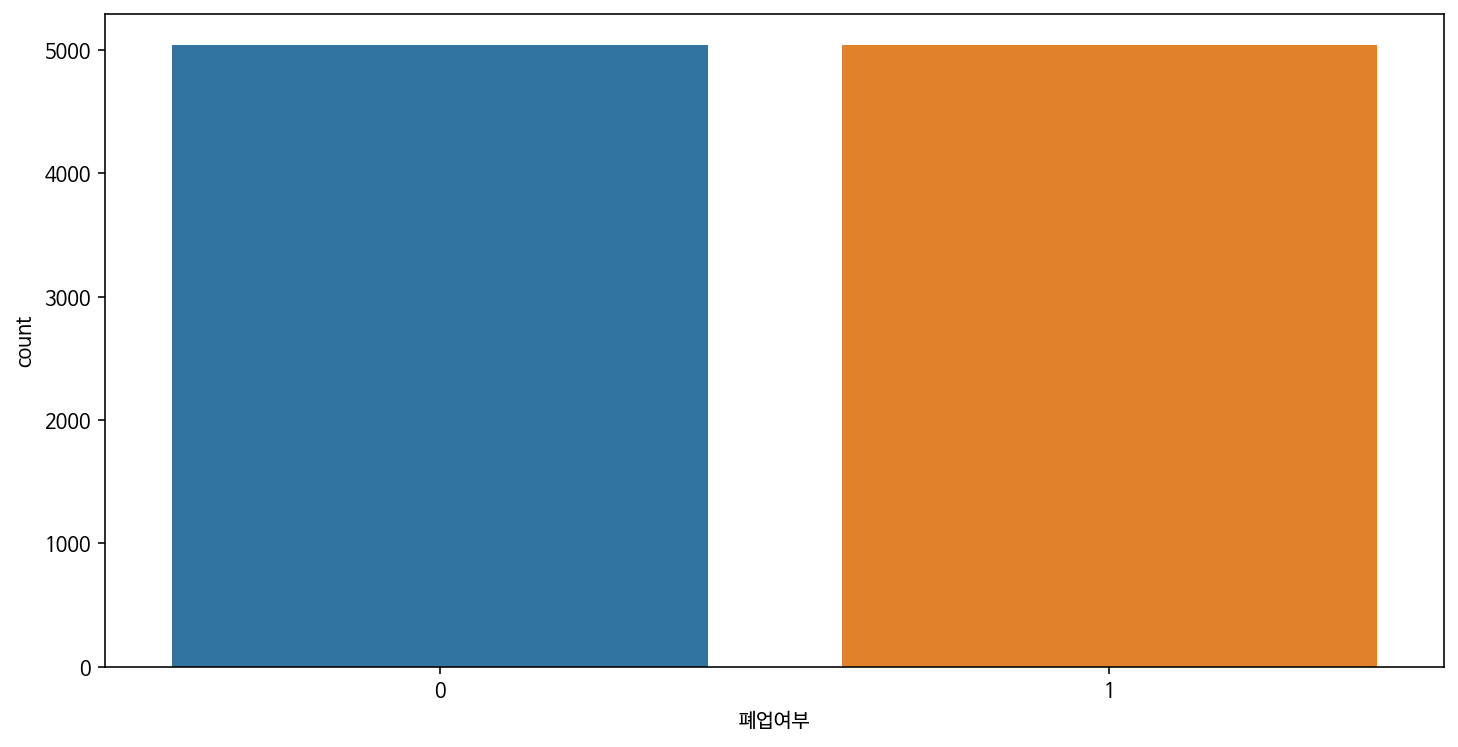

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='폐업여부', data=handled_data)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x3 = pd.concat([handled_data.iloc[:,:44],handled_data.iloc[:,47:]], axis=1)
X3 = x3.to_numpy()
target3 = handled_data['폐업여부'].to_numpy() # 타겟 데이터

In [ ]:
x3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10074 entries, 0 to 10073
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동자산             10074 non-null  float64
 1   매출채권             10074 non-null  float64
 2   비유동자산            10074 non-null  float64
 3   유형자산             10074 non-null  float64
 4   자산총계             10074 non-null  float64
 5   유동부채             10074 non-null  float64
 6   비유동부채            10074 non-null  float64
 7   부채총계             10074 non-null  float64
 8   자본금              10074 non-null  float64
 9   이익잉여금(결손금)       10074 non-null  float64
 10  자본총계             10074 non-null  float64
 11  매출액              10074 non-null  float64
 12  판매비와관리비          10074 non-null  float64
 13  영업이익(손실)         10074 non-null  float64
 14  법인세비용차감전순손익      10074 non-null  float64
 15  법인세비용            10074 non-null  float64
 16  당기순이익(손실)        10074 non-null  float64
 17  기업순이익률      

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit3 = scaler.fit(X3)
X_scaled3 = scaler_fit3.transform(X3)

In [ ]:
train_input3, test_input3, train_target3, test_target3 = train_test_split(X_scaled3, target3, test_size=0.2, random_state=42)

## Model 1. XGBoost

In [ ]:
#XGboost 모델 구축하기
clf_xgb3 = xgb.XGBClassifier(objective='binary:logistic',max_depth = 30, missing=None)
clf_xgb3.fit(train_input3,
            train_target3,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(test_input3, test_target3)])

[0]	validation_0-aucpr:0.970967
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.971559
[2]	validation_0-aucpr:0.973757
[3]	validation_0-aucpr:0.974609
[4]	validation_0-aucpr:0.974638
[5]	validation_0-aucpr:0.975051
[6]	validation_0-aucpr:0.978259
[7]	validation_0-aucpr:0.978473
[8]	validation_0-aucpr:0.97891
[9]	validation_0-aucpr:0.979476
[10]	validation_0-aucpr:0.979758
[11]	validation_0-aucpr:0.980302
[12]	validation_0-aucpr:0.980765
[13]	validation_0-aucpr:0.982464
[14]	validation_0-aucpr:0.982878
[15]	validation_0-aucpr:0.982949
[16]	validation_0-aucpr:0.983372
[17]	validation_0-aucpr:0.983666
[18]	validation_0-aucpr:0.983785
[19]	validation_0-aucpr:0.983907
[20]	validation_0-aucpr:0.983926
[21]	validation_0-aucpr:0.984083
[22]	validation_0-aucpr:0.984155
[23]	validation_0-aucpr:0.984358
[24]	validation_0-aucpr:0.984541
[25]	validation_0-aucpr:0.98466
[26]	validation_0-aucpr:0.984755
[27]	validation_0-aucpr:0.984904
[28]	validation_0-aucp

XGBClassifier(max_depth=30)

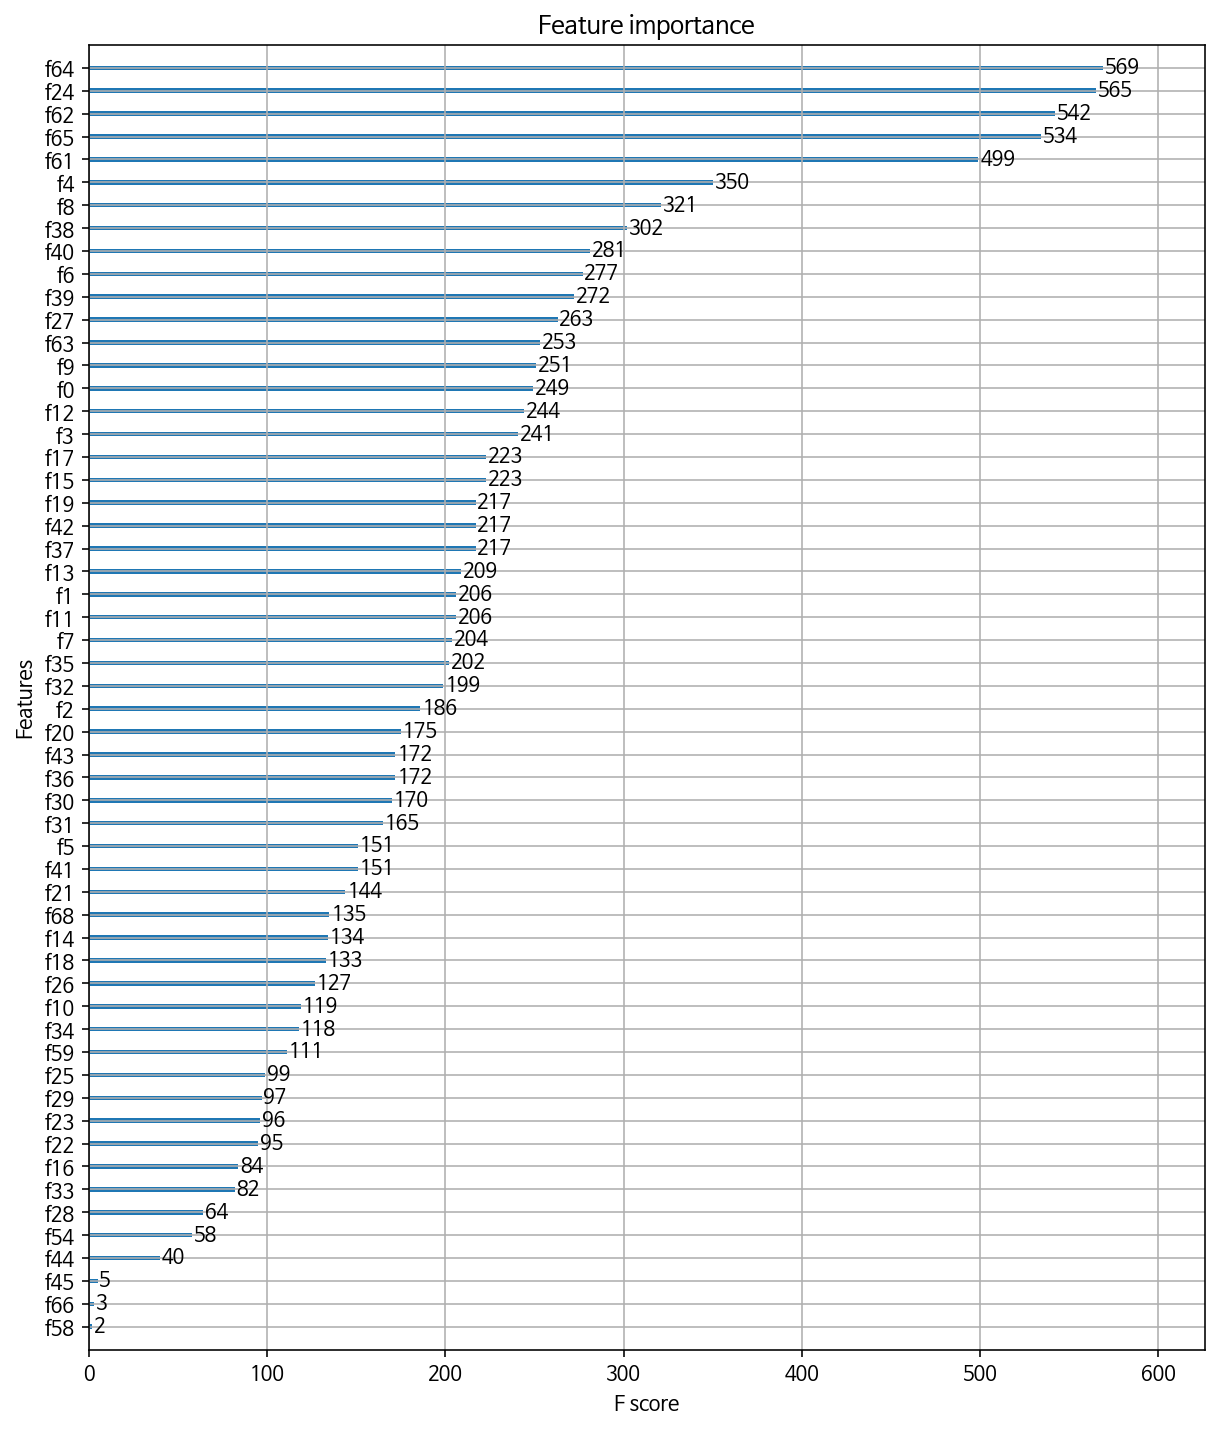

In [ ]:
#feature importance graph
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(clf_xgb3, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


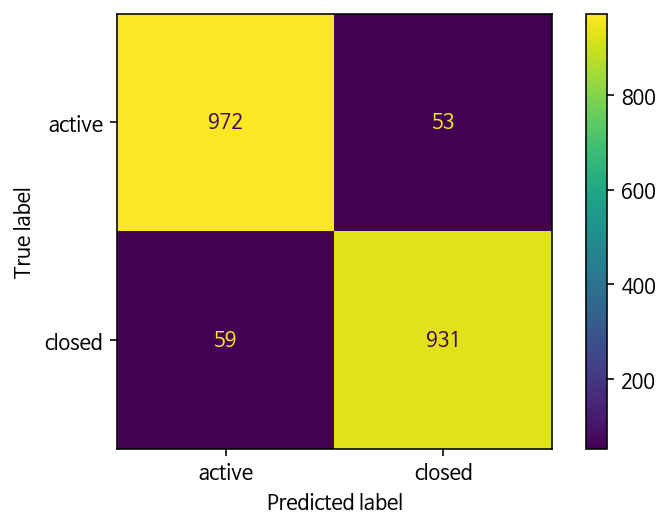

In [ ]:
plot_confusion_matrix(clf_xgb3,
                      test_input3,
                      test_target3,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs3 = clf_xgb3.predict(test_input3)
y_preds3 = [1 if x>0.5 else 0 for x in y_pred_probs3]
print(confusion_matrix(test_target3, y_preds3))
print(classification_report(test_target3, y_preds3))
print(roc_auc_score(test_target3, y_preds3))

[[972  53]
 [ 59 931]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1025
           1       0.95      0.94      0.94       990

    accuracy                           0.94      2015
   macro avg       0.94      0.94      0.94      2015
weighted avg       0.94      0.94      0.94      2015

0.9443483616654348


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target3, y_preds3))

from sklearn.metrics import recall_score

print(recall_score(test_target3, y_preds3))

from sklearn.metrics import precision_score

print(precision_score(test_target3, y_preds3))

from sklearn.metrics import f1_score

print(f1_score(test_target3, y_preds3))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target3, y_preds3))

0.9444168734491315
0.9404040404040404
0.9461382113821138
0.9432624113475178
0.9443483616654348


## Model 2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier(random_state=42)
rfc3.fit(train_input3, train_target3)
y_pred3 = rfc3.predict(test_input3)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_target3, y_pred3)))

Model accuracy score with 10 decision-trees : 0.9370


In [ ]:
# 깊이 100으로
rfc0_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc0_100.fit(train_input0, train_target0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
y_pred0_100 = rfc0_100.predict(test_input0)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_target0, y_pred0_100)))

Model accuracy score with 100 decision-trees : 0.9353


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target3, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1025
           1       0.96      0.91      0.93       990

    accuracy                           0.94      2015
   macro avg       0.94      0.94      0.94      2015
weighted avg       0.94      0.94      0.94      2015



In [ ]:
feature_scores0 = pd.Series(rfc3.feature_importances_).sort_values(ascending=False)
feature_scores0[:10]

4     0.090329
61    0.081826
0     0.072697
7     0.069828
62    0.060377
5     0.057116
24    0.045177
10    0.044805
11    0.041445
2     0.038787
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target3, y_pred3))

from sklearn.metrics import recall_score

print(recall_score(test_target3, y_pred3))

from sklearn.metrics import precision_score

print(precision_score(test_target3, y_pred3))

from sklearn.metrics import f1_score

print(f1_score(test_target3, y_pred3))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target3, y_pred3))

0.9369727047146402
0.9111111111111111
0.9585547290116897
0.9342309684101502
0.936531165311653


## Model 3. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm3 = LGBMClassifier(n_estimators=400)
evals = [(test_input3, test_target3)]
lgbm3.fit(train_input3, train_target3, early_stopping_rounds=100, eval_metric='logloss',
        eval_set=evals, verbose=True)
preds3 = lgbm3.predict(test_input3)
pred_proba3 = lgbm3.predict_proba(test_input3)[:,1]

[1]	valid_0's binary_logloss: 0.620121	valid_0's binary_logloss: 0.620121
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.560515	valid_0's binary_logloss: 0.560515
[3]	valid_0's binary_logloss: 0.510477	valid_0's binary_logloss: 0.510477
[4]	valid_0's binary_logloss: 0.468194	valid_0's binary_logloss: 0.468194
[5]	valid_0's binary_logloss: 0.432579	valid_0's binary_logloss: 0.432579
[6]	valid_0's binary_logloss: 0.401444	valid_0's binary_logloss: 0.401444
[7]	valid_0's binary_logloss: 0.373767	valid_0's binary_logloss: 0.373767
[8]	valid_0's binary_logloss: 0.350104	valid_0's binary_logloss: 0.350104
[9]	valid_0's binary_logloss: 0.32867	valid_0's binary_logloss: 0.32867
[10]	valid_0's binary_logloss: 0.310062	valid_0's binary_logloss: 0.310062
[11]	valid_0's binary_logloss: 0.293317	valid_0's binary_logloss: 0.293317
[12]	valid_0's binary_logloss: 0.278921	valid_0's binary_logloss: 0.278921
[13]	valid_0's binary_logloss: 0.266456	valid_0'

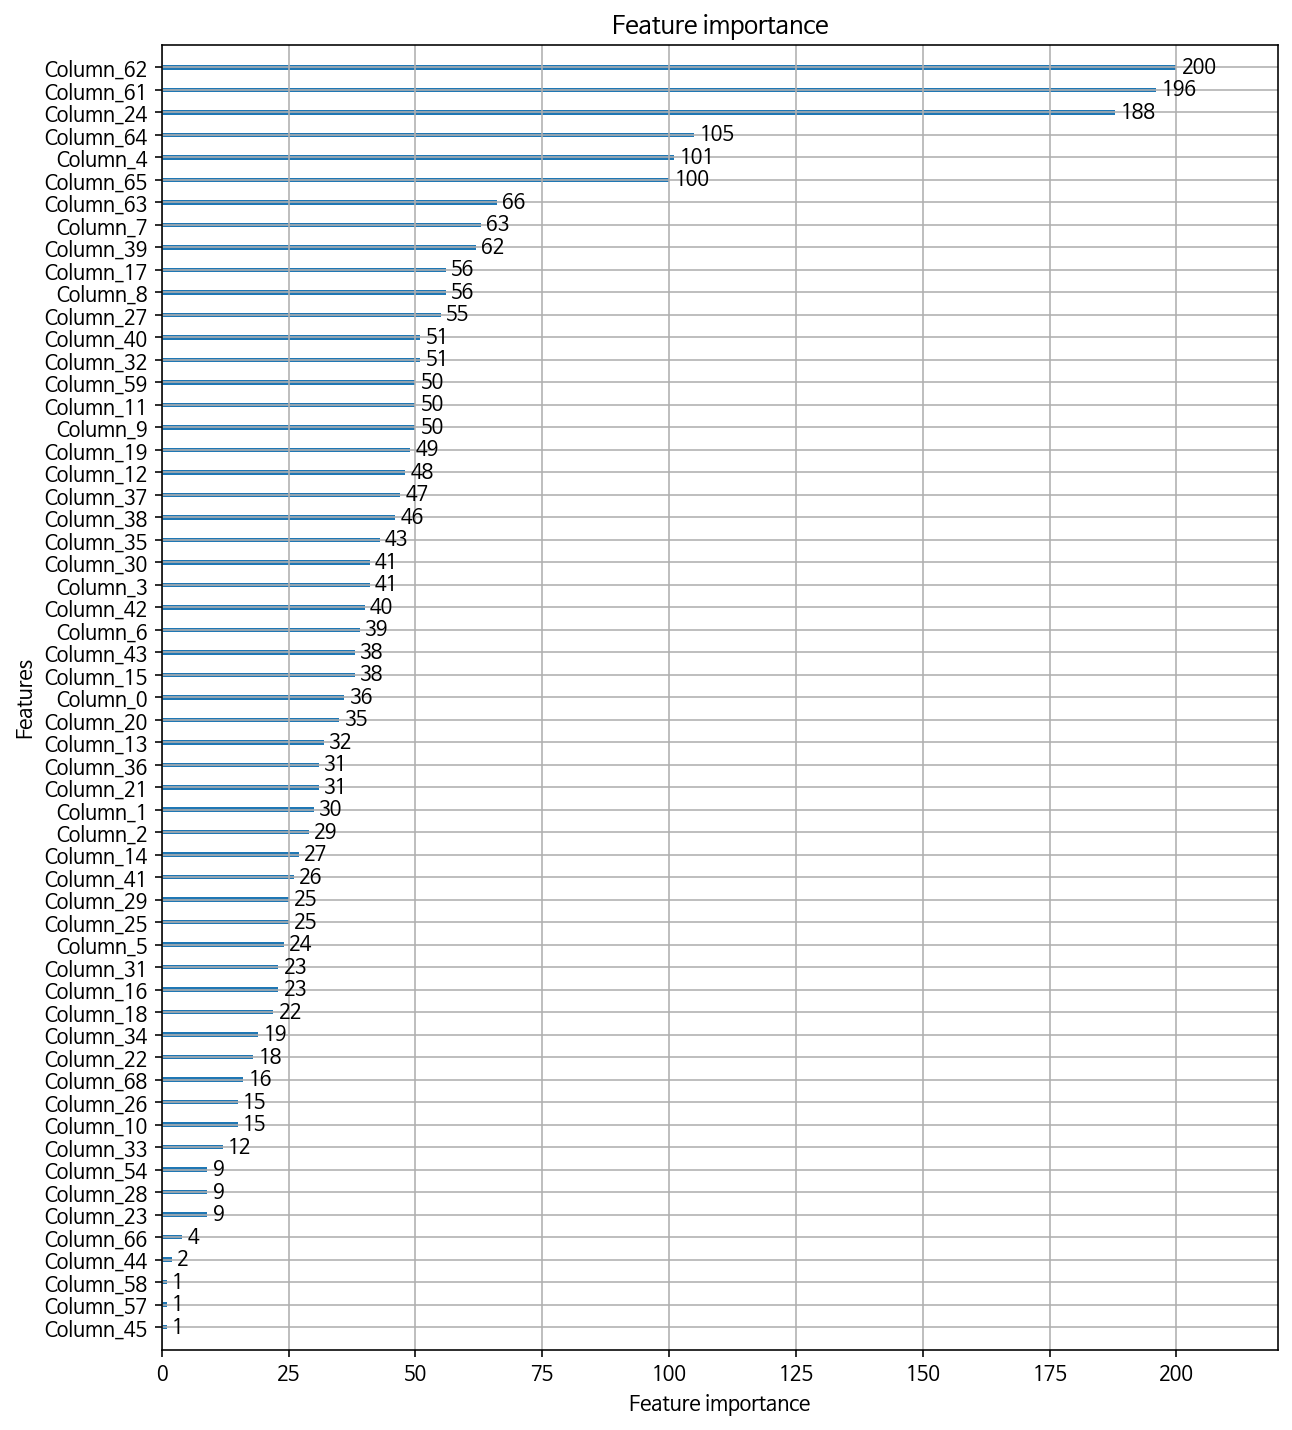

In [ ]:
#feature importance graph
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm3, ax=ax)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


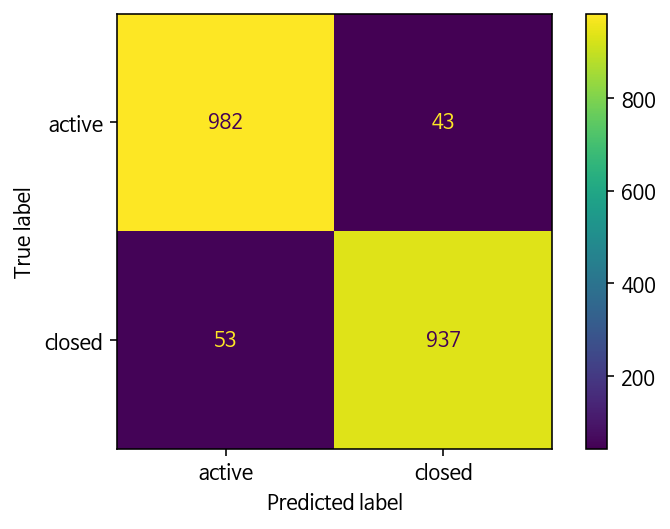

In [ ]:
plot_confusion_matrix(lgbm3,
                      test_input3,
                      test_target3,
                      values_format='d',
                      display_labels = ['active', 'closed'])

In [ ]:
#성능평가 결과값
y_pred_probs_lgbm3 = lgbm3.predict(test_input3)
y_preds_lgbm3 = [1 if x>0.5 else 0 for x in y_pred_probs_lgbm3]
print(confusion_matrix(test_target3, y_preds_lgbm3))
print(classification_report(test_target3, y_preds_lgbm3))
print(roc_auc_score(test_target3, y_preds_lgbm3))

[[982  43]
 [ 53 937]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1025
           1       0.96      0.95      0.95       990

    accuracy                           0.95      2015
   macro avg       0.95      0.95      0.95      2015
weighted avg       0.95      0.95      0.95      2015

0.9522567134762256


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target3, y_preds_lgbm3))

from sklearn.metrics import recall_score

print(recall_score(test_target3, y_preds_lgbm3))

from sklearn.metrics import precision_score

print(precision_score(test_target3, y_preds_lgbm3))

from sklearn.metrics import f1_score

print(f1_score(test_target3, y_preds_lgbm3))

from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_target3, y_preds_lgbm3))

0.9523573200992556
0.9464646464646465
0.9561224489795919
0.9512690355329949
0.9522567134762256
